In [1]:
import pandas as pd
import pygmt
import csv
import numpy as np

In [2]:
# 
stations = pd.read_table(r"C:\Users\dodos\diplomski\sjever\station.lst",header=None, sep=' ')

# opcije za path su r"Filter_7-20s_SNR_3_tw_50\\" ili r"Filter_8-20s_SNR_4_tw_50\\"
#path = r"Filter_7-20s_SNR_3_tw_50\\"
path = r"Filter_8-20s_SNR_4_tw_50\\"
#path = r"Filter_7-25s_SNR_3.5_tw_50//"

data=list()
data_null=list()
data_good_only=list()
data_total=list()
potresi_good_average = list()

# pretvorba rezultata u odgovarajuči format
counter_total = 0
counter_good = 0

for station,lat,long in zip(stations[0],stations[2],stations[3]):
    with open(
            path + str(station) + r"\Single_Splitting\splitting_results_auto.txt",
            encoding='utf-8') as autofile:
        csvreader = csv.reader(autofile, delimiter=' ')
        stations = []
        for row in csvreader:
            if 'category' in row:
                index = row.index('category')
                stations.append(row[:index + 1])
                stations.append(row[-len(row) + index + 1:])
            else:
                stations.append(row)
    # spremanje modificiranih datoteka kao _auto_moded kako bi se lakše parsirali kasnije
    with open( path + str(station) + r"\Single_Splitting\splitting_results_auto_moded.txt", 'w') as out:
        for row in stations:
            for item in row:
                out.write(item + ' ')
            out.write('\n')

    df = pd.read_table(path + str(station) + r"\Single_Splitting\splitting_results_auto_moded.txt", sep=' ', )

# odabir samo dobrih i average rezultata
    for i in range(0,len(df['baz'])):
        counter_total += 1
        data_total.append([station, lat, long, df['baz'][i], df['delta'][i], df['category'][i]])
        if df['category'][i] == 'good' or df['category'][i]  == 'average': 
            counter_good += 1
            potresi_good_average.append([df['lat'][i], df['lon'][i]])
            data.append([station, lat, long, df['baz'][i], df['delta'][i]])
        if df['category'][i] == 'good' : 
            data_good_only.append([station, lat, long, df['baz'][i], df['delta'][i]])
            
# odabir samo null rezultata
        if df['category'][i] == 'null-measurement':
            data_null.append([station, lat, long, df['baz'][i], df['delta'][i]])

In [3]:
print('ukupno seizmograma', counter_total)
print('dobrih i zadovoljavajucih seizmograma', counter_good)

ukupno seizmograma 532
dobrih i zadovoljavajucih seizmograma 95


In [4]:
# Broj potresa koji zadovoljavaju SNR uvijete  

df_data_total = pd.DataFrame(data_total, columns=['Station', 'Latitude', 'Longitude', "phi", "dt", "category"])
df_data_total.dropna(inplace=True)

df_data_total['Latitude'] = pd.to_numeric(df_data_total['Latitude'], errors='coerce')
df_data_total['Longitude'] = pd.to_numeric(df_data_total['Longitude'], errors='coerce')
df_data_total['phi'] = pd.to_numeric(df_data_total['phi'], errors='coerce')
df_data_total['dt'] = pd.to_numeric(df_data_total['dt'], errors='coerce')

#stations = pd.read_table(r"C:\Users\dodos\diplomski\sjever\station.lst",header=None, sep=' ')
stations = pd.read_table(r"station.lst",header=None, sep=' ')
stations.columns = ['Name', 'network', 'latitude', 'longitude']

for station in stations['Name']:
    print(station, len(df_data_total.loc[df_data_total['Station'] == station]))

A250A 12
A251A 8
A252A 24
A253A 19
A254A 5
A255A 5
A050A 26
A051A 23
A052A 13
MOSL 27
DUGI 33
KALN 34
KIJV 31
KSY 25
LOBO 15
MORI 37
NVLJ 13
OZLJ 18
PLIT 21
PTJ 30
RABC 6
SLNJ 17
UDBI 21
VIRC 24
ZIRJ 45


broj potresa koji zadovoljavaju SNR

In [5]:
#pretvaranje liste dobrih i average rezultata u dataframe

df_category_good = pd.DataFrame(data, columns=['Station', 'Latitude', 'Longitude', "phi", "dt"])
df_category_good.dropna(inplace=True)

df_category_good['Latitude'] = pd.to_numeric(df_category_good['Latitude'], errors='coerce')
df_category_good['Longitude'] = pd.to_numeric(df_category_good['Longitude'], errors='coerce')
df_category_good['phi'] = pd.to_numeric(df_category_good['phi'], errors='coerce')
df_category_good['dt'] = pd.to_numeric(df_category_good['dt'], errors='coerce')

In [6]:
for station in stations['Name']:
    print(station, len(df_category_good.loc[df_category_good['Station'] == station]))

A250A 0
A251A 2
A252A 10
A253A 0
A254A 0
A255A 0
A050A 0
A051A 7
A052A 1
MOSL 7
DUGI 4
KALN 14
KIJV 1
KSY 2
LOBO 8
MORI 9
NVLJ 2
OZLJ 1
PLIT 1
PTJ 15
RABC 0
SLNJ 3
UDBI 1
VIRC 0
ZIRJ 7


In [7]:
# samo "good" rezultati
df_category_good_only = pd.DataFrame(data_good_only, columns=['Station', 'Latitude', 'Longitude', "phi", "dt"])
df_category_good_only.dropna(inplace=True)

df_category_good_only['Latitude'] = pd.to_numeric(df_category_good_only['Latitude'], errors='coerce')
df_category_good_only['Longitude'] = pd.to_numeric(df_category_good_only['Longitude'], errors='coerce')
df_category_good_only['phi'] = pd.to_numeric(df_category_good_only['phi'], errors='coerce')
df_category_good_only['dt'] = pd.to_numeric(df_category_good_only['dt'], errors='coerce')

In [8]:
# null rezultati

dfdata_null = pd.DataFrame(data_null, columns=['Station', 'Latitude', 'Longitude', "phi", "dt"])
dfdata_null.dropna(inplace=True)

dfdata_null['Latitude'] = pd.to_numeric(dfdata_null['Latitude'], errors='coerce')
dfdata_null['Longitude'] = pd.to_numeric(dfdata_null['Longitude'], errors='coerce')
dfdata_null['phi'] = pd.to_numeric(dfdata_null['phi'], errors='coerce')
dfdata_null['dt'] = pd.to_numeric(dfdata_null['dt'], errors='coerce')

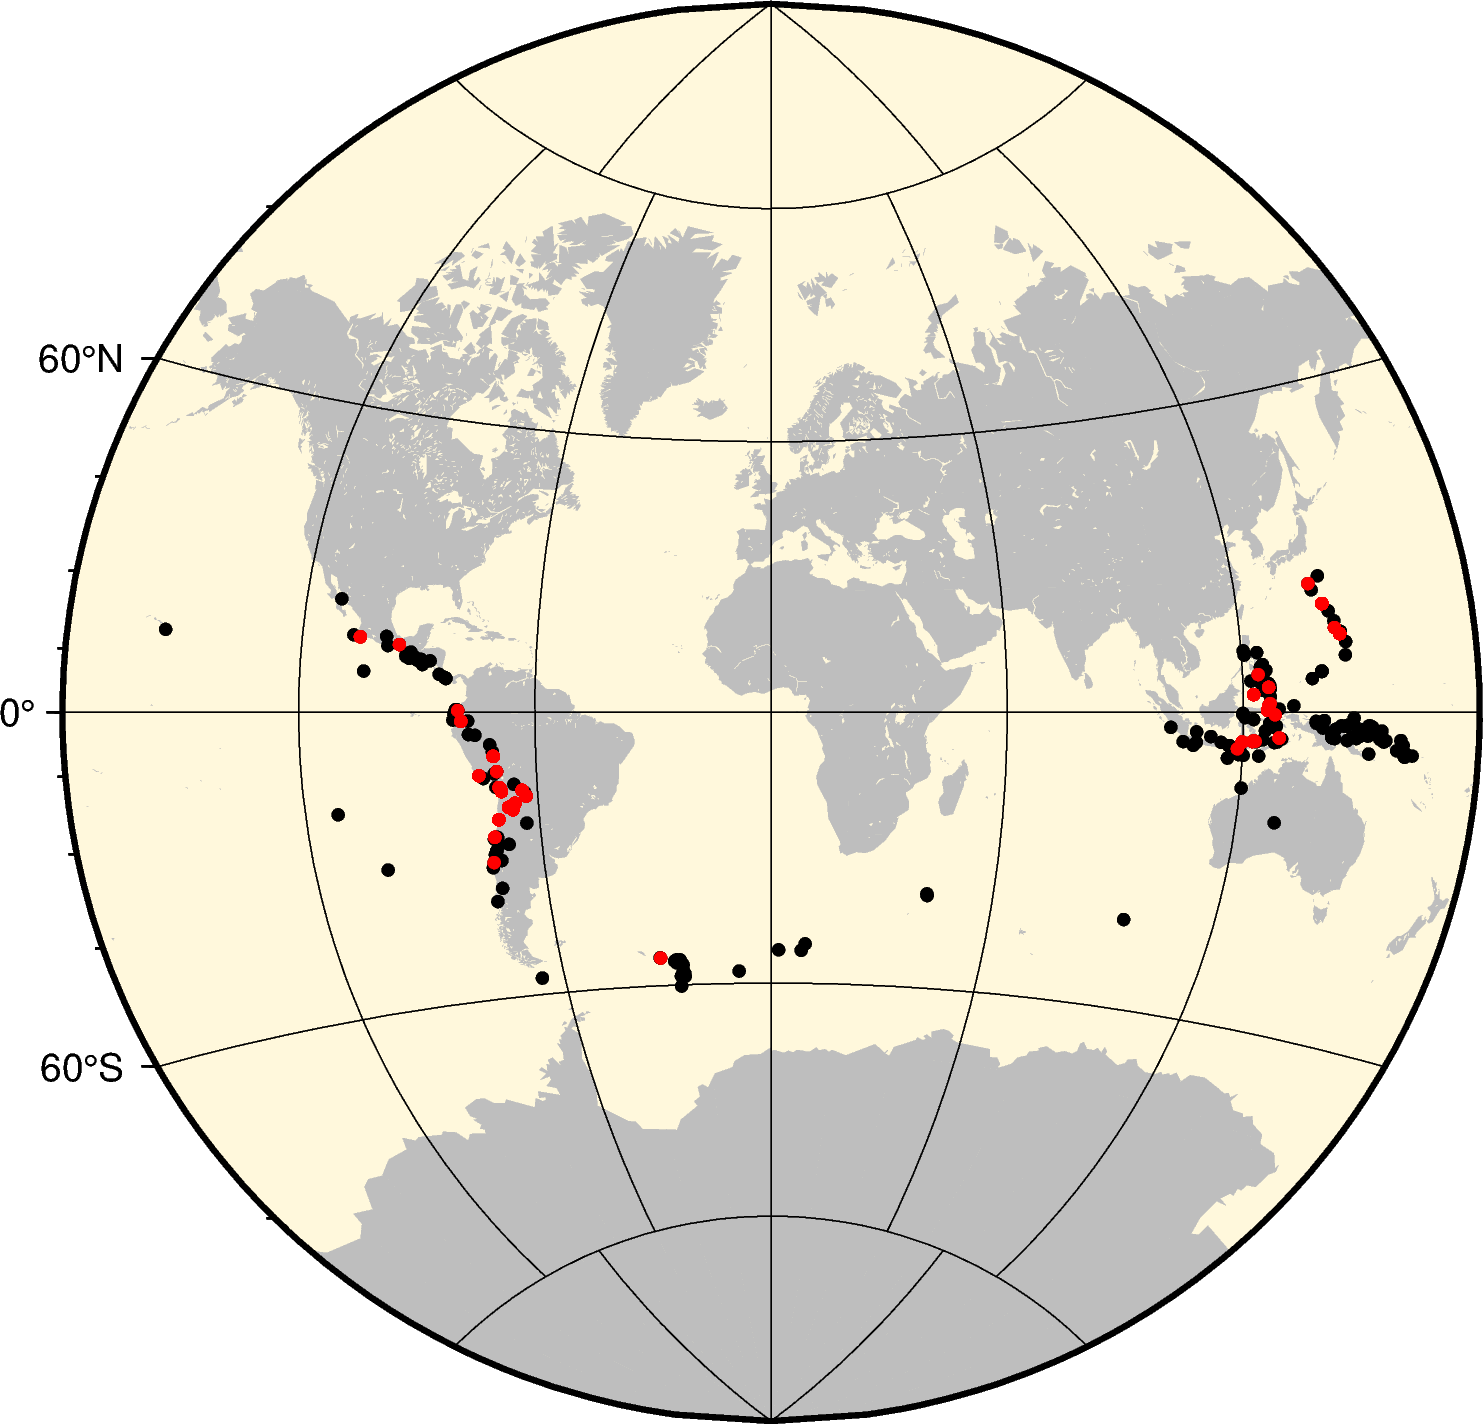

In [9]:
df_locs = pd.read_table('popis_potresa.csv', sep=',' )

fig_radial = pygmt.Figure()
fig_radial.coast(region="d", projection="V12c", land="gray", water="cornsilk", frame="afg")
fig_radial.plot(
        x=df_locs['longitude'],
        y=df_locs['latitude'],
        style="c0.1c",
        color="black",
        pen='black',
    )


potresi_good_average_df = pd.DataFrame(potresi_good_average, columns=['Latitude', 'Longitude'])

potresi_good_average_df.dropna(inplace=True)
potresi_good_average_df

fig_radial.plot(
        x=potresi_good_average_df['Longitude'],
        y=potresi_good_average_df['Latitude'],
        style="c0.1c",
        color="red",
        pen='red',
    )


fig_radial.show()

Svi epicentri prikazani u Van Den Grinten projekciji koji zadovoljavaju uvijet da su >90 i <135 stupnjeva udaljeni od mjesta promatranja. Crveno su naznačeni događaji koji su dali rezultat dobre ili prosiječne kvalitete


coast [WARNING]: Fill/clip continent option (-G) may not work for this projection.
coast [WARNING]: If the antipode (8.26149e-312/2.28259e-312) is in the ocean then chances are good it will work.
coast [WARNING]: Otherwise, avoid projection center coordinates that are exact multiples of 195 degrees.


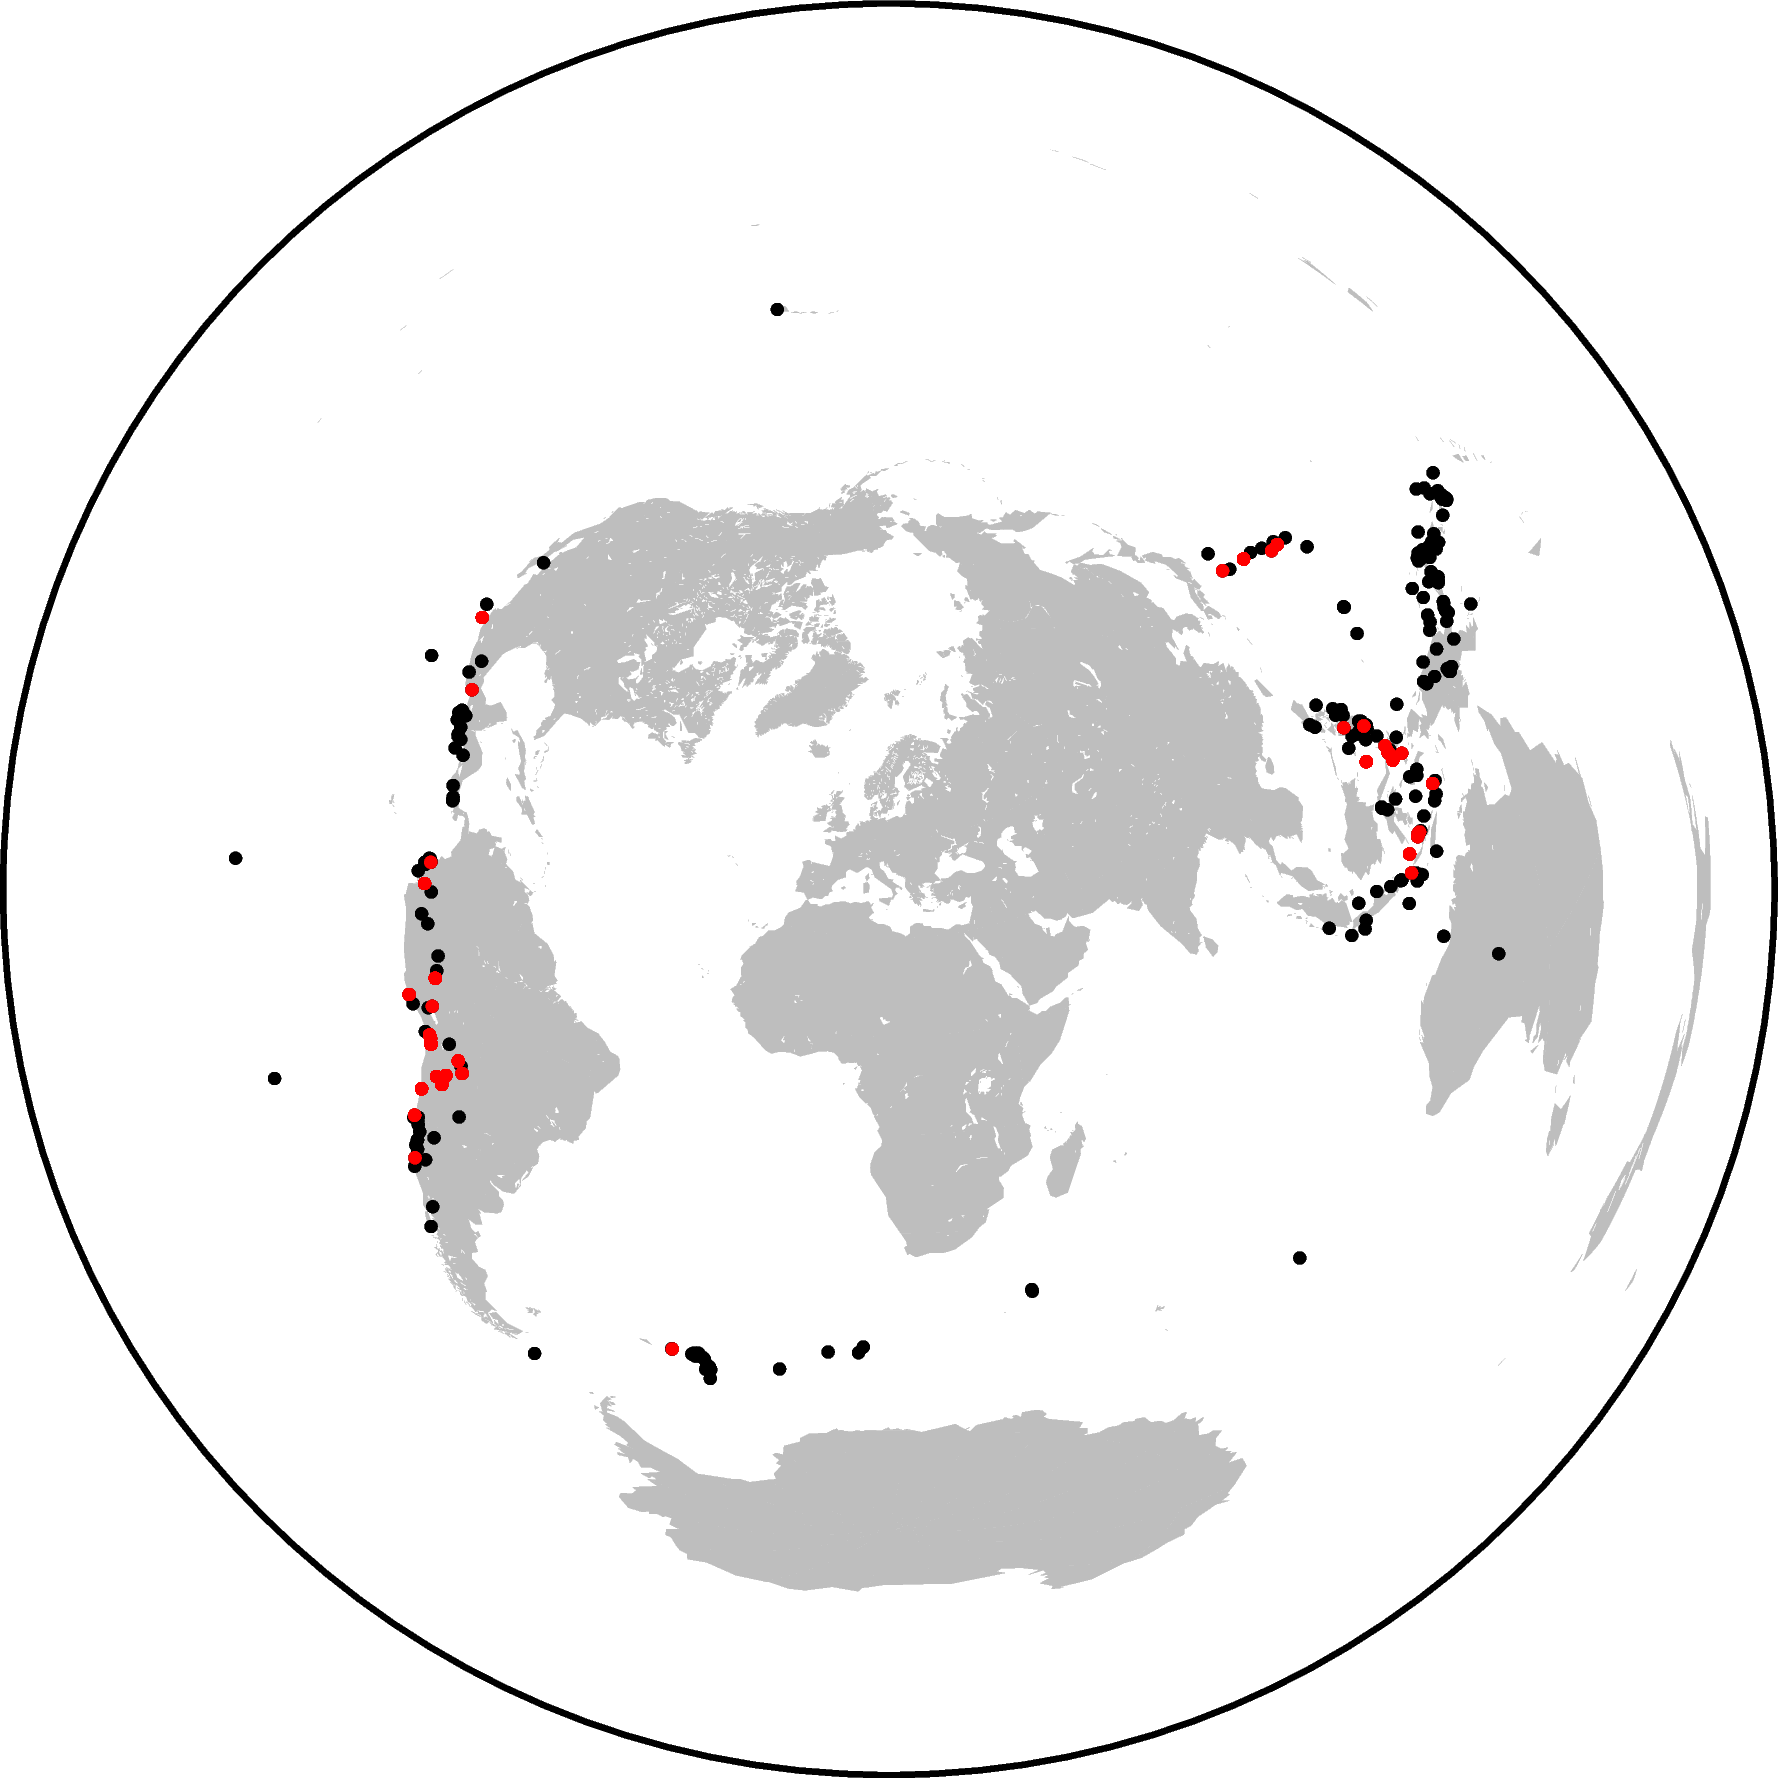

In [10]:
fig = pygmt.Figure()
fig.coast(projection="E15/40/15c", region="g", frame="a", land="gray")

fig.plot(
        x=df_locs['longitude'],
        y=df_locs['latitude'],
        style="c0.1c",
        color="black",
        pen='black',
    )


potresi_good_average_df = pd.DataFrame(potresi_good_average, columns=['Latitude', 'Longitude'])

potresi_good_average_df.dropna(inplace=True)
potresi_good_average_df

fig.plot(
        x=potresi_good_average_df['Longitude'],
        y=potresi_good_average_df['Latitude'],
        style="c0.1c",
        color="red",
        pen='red',
    )

#xx=np.linspace(0,360,num=1000)
#yy=[]
#for i in range(1000):
#    yy.append(-60)
#fig.plot(
#        x=xx,
#        y=yy,
#        style="c0.03c",
#        color="black",
#        pen='black',
#    )
fig.show()


Svi epicentri prikazani u Ekvidistantnoj azimutalnoj projekciji koji zadovoljavaju uvijet da su >90 i <135 stupnjeva udaljeni od mjesta promatranja. Crveno su naznačeni događaji koji su dali rezultat dobre ili prosiječne kvalitete

C:\Users\dodos\AppData\Local\Temp\ipykernel_10124\3034345048.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  temp_stations = stations.loc[stations['Name'].str.contains("([A]\d)", case=True)]
C:\Users\dodos\AppData\Local\Temp\ipykernel_10124\3034345048.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  perm_stations = stations.loc[stations['Name'].str.contains("([A-Z]{3,})", case=False)]


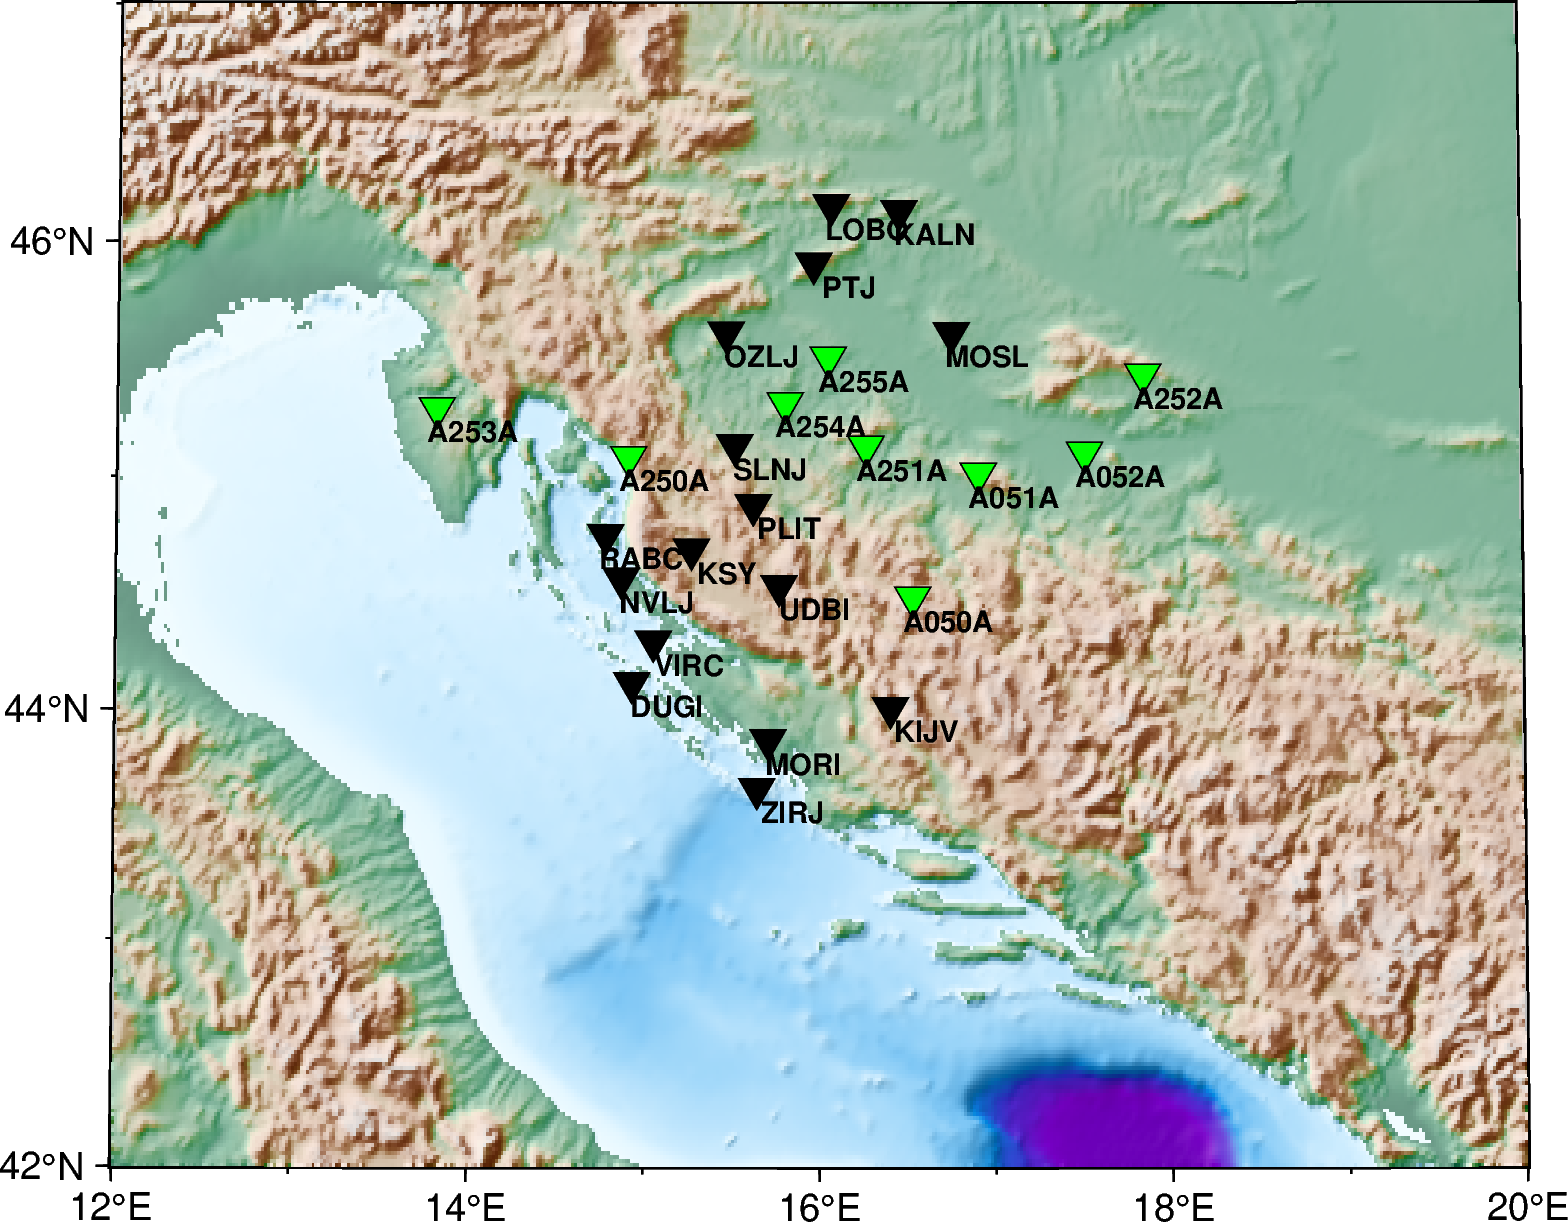

In [11]:
stations = pd.read_table(r"station.lst",header=None, sep=' ')
stations.columns = ['Name', 'network', 'latitude', 'longitude']


fig_stations = pygmt.Figure()
#fig_stations.basemap(region=[13, 19, 43, 46], projection="M5c", frame=True)
fig_stations.coast(
region=[12, 20, 42, 47], projection="V12c", land="gray", water="lightblue", frame="afg", borders = 1)

pygmt.makecpt(cmap='terra', series="-7000/4000/100",
                      continuous=True)
fig_stations.grdimage(
    grid="@earth_relief_01m",
    shading=True,
    cmap='terra',
    )
temp_stations = stations.loc[stations['Name'].str.contains("([A]\d)", case=True)]
perm_stations = stations.loc[stations['Name'].str.contains("([A-Z]{3,})", case=False)]  
fig_stations.plot(
        x=temp_stations['longitude'],
        y=temp_stations['latitude'],
        style="i0.35c",
        color="green",
        pen='black',
    )
fig_stations.plot(
        x=perm_stations['longitude'],
        y=perm_stations['latitude'],
        style="i0.35c",
        color="black",
        pen='black',
    )
fig_stations.text(
        text=stations['Name'],
        x=stations['longitude'],
        y=stations['latitude'],
        font="7p,Helvetica-Bold,black",
        offset='0.3/-0.2')
fig_stations.show()

Ilustracija svih seizmoloških postaja koje su razmatrane u ovom radu. Zelenom bojom su naznačene one stanice koje pripadaju privremenoj mreži seizmografa. 

In [12]:
df_category_good = pd.DataFrame(data, columns=['Station', 'Latitude', 'Longitude', "phi", "dt"])

df_category_good['Latitude'] = pd.to_numeric(df_category_good['Latitude'], errors='coerce')
df_category_good['Longitude'] = pd.to_numeric(df_category_good['Longitude'], errors='coerce')
df_category_good['phi'] = pd.to_numeric(df_category_good['phi'], errors='coerce')
df_category_good['dt'] = pd.to_numeric(df_category_good['dt'], errors='coerce')        

In [13]:
# glavna funkcija za vizualizaciju rezultata SKS splittinga sa prikazom stanica 

def plot_splitting_map(sks_meas_all, boxcoordinates,
                       dcoord=0.5,
                       figname='splitting_map.png',
                       frame=["a1f0.25", "WSen"],
                       topo_data="@earth_relief_01m",
                       colormap="etopo1",
                       proj="M5c",
                       markerstyle="cc",
                       markersizescale=0.03*2,
                       markerstyle_nocmap="c0.25c",
                       markercolor="blue",
                       pencolor='black',
                       penwidth="1p",
                       dtscale=0.5,
                       measurement_cmap=True,
                       markercolormap="viridis",
                       colorbar=True,
                      legend=True):
    '''
    Plot the shear wave splitting measurements using pygmt
    param sks_meas_all: pandas dataframe with `Longitude`, `Latitude`, `phi`, and `dt` columns.
    param boxcoordinates: list with minimum longitude, maximum longitude, minimum latitude, maximum latitude
    param dcoord: offset of the map from the given coordinates
    param figname: output figure name
    param topo_data: topographic data str
    param colormap: colormap for the topographic data. Defaults to None
    param proj: projection of the map
    param measurement_cmap: boolean. plot markers using the colormap
    param markerstyle: marker style for colormapped markers
    param markerstyle_nocmap: marker style without colormap
    param markercolor: marker color without colormap
    param pencolor: pen color for the splitting lines
    param dtscale: scale for delay time on the map
    '''
    minlon, maxlon = boxcoordinates[0], boxcoordinates[1]
    minlat, maxlat = boxcoordinates[2], boxcoordinates[3]
    minlon, maxlon, minlat, maxlat = (
        minlon - dcoord,
        maxlon + dcoord,
        minlat - dcoord,
        maxlat + dcoord,
    )

    res = "f"

    fig = pygmt.Figure()
    fig.basemap(region=[minlon, maxlon, minlat, maxlat],
                projection=proj, frame=frame)
    if colormap is not None:
        pygmt.makecpt(cmap=colormap, series="-7000/4000/100",
                      continuous=True)
        fig.grdimage(
            grid=topo_data,
            shading=True,
            cmap=colormap,
        )

        fig.coast(
            frame=frame,
            resolution=res,
            shorelines=["1/0.2p,black", "2/0.05p,gray"],
            borders=1,
        )
    else:
        fig.coast(land="lightgray", water="skyblue", resolution=res,
                  shorelines=["1/0.2p,black", "2/0.05p,gray"],
                  borders=1,)

    phivals = 90-sks_meas_all['phi'].values
    dtvals = dtscale*sks_meas_all['dt'].values
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="i0.35c",
        color="black",
        pen='black',
    )
    
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor ,
        direction=[
            phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme 
        ],  # angle (from xaxis) and magnitude
    )
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor , 
        direction=[
            180+phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme
        ],  # angle (from xaxis) and magnitude

    )
    fig.text(
        text=sks_meas_all['Station'],
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
       # position="BR",
        font="5p,Helvetica-Bold,black",
        offset='0.3/-0.2'
    )
    if legend:
        delaytimearrays = [1.0, 2.0, 3.0]
        ydiff = 0.2
        xdiff = 2
        yloc = (maxlat-dcoord+2*ydiff)
        xloc = minlon+dcoord
        
        print(xdiff, ydiff)
        
        fig.plot(x=xloc+xdiff/2+0.05, y=yloc-len(delaytimearrays)/2*ydiff-0.05,
                   style=f"r{len(delaytimearrays)}/{len(delaytimearrays)/2}",
                 color="white", pen="1p,black")

        xloc += xdiff
        for dltime in delaytimearrays:
            yloc -= ydiff
            fig.plot(
                x=xloc-xdiff,
                y=yloc,
                style="v0i+e",
                pen='black',
                direction=[
                    [0],
                    [dtscale*dltime],
                ],  # angle (from xaxis) and magnitude
            )
            fig.text(x=xloc, y=yloc,
                     text=f"{dltime} s", font="0.3c,Helvetica")

    fig.show()
    fig.savefig(figname, crop=True, dpi=1080)

In [14]:
minlon, maxlon = 13, 21
minlat, maxlat = 43, 47

2 0.2


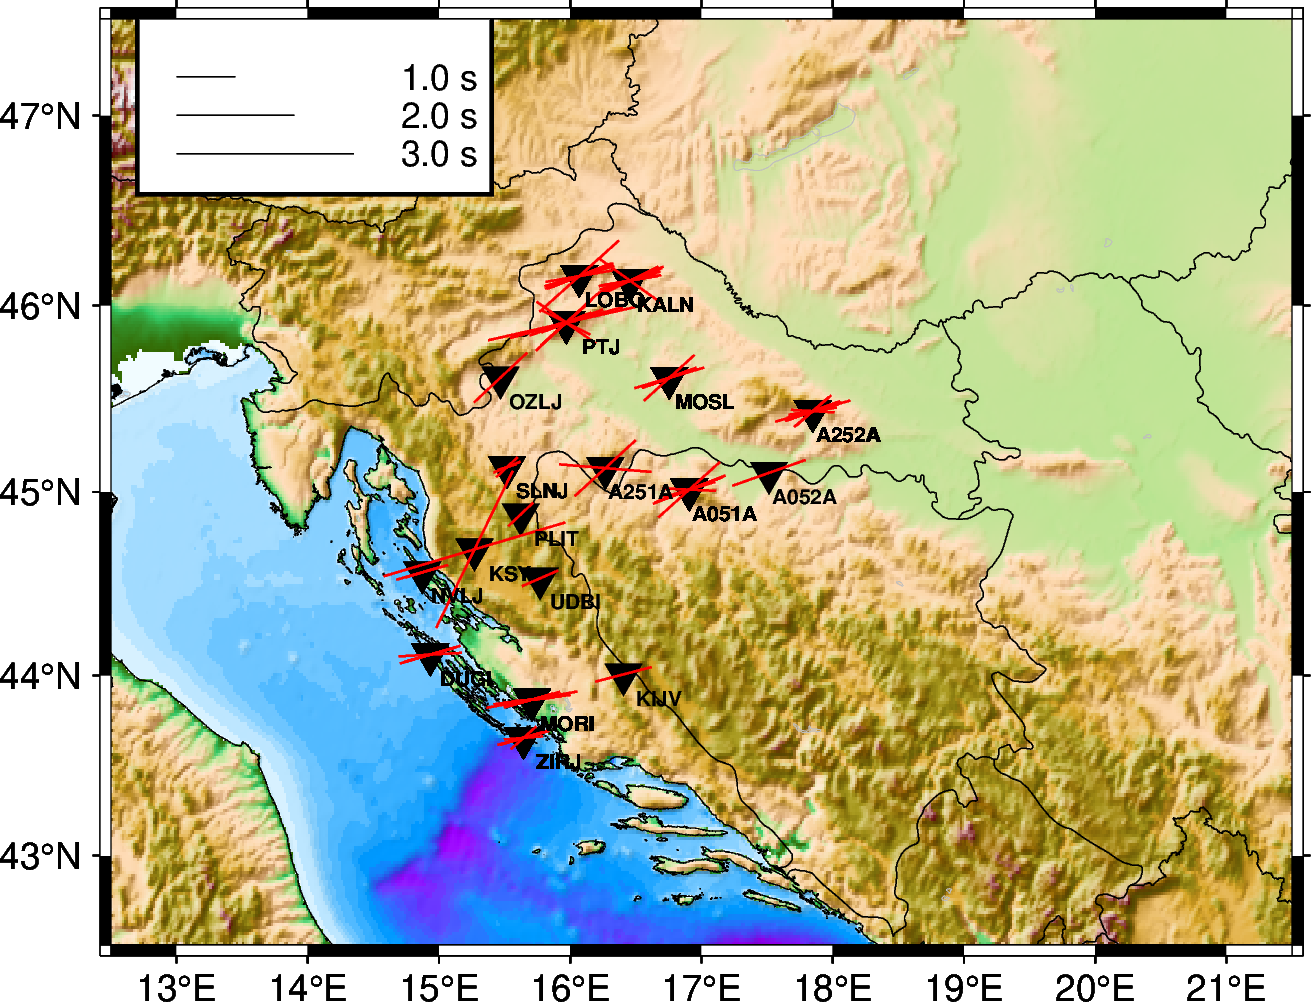

In [15]:
plot_splitting_map(df_category_good, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="0.5p",
                   proj="M10c", figname=r'Filter_8-20s_SNR_4_tw_50\8-20s_SNR_4_good_average.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='red')

Dobri i prosijecni rezultati splittinga 

2 0.2


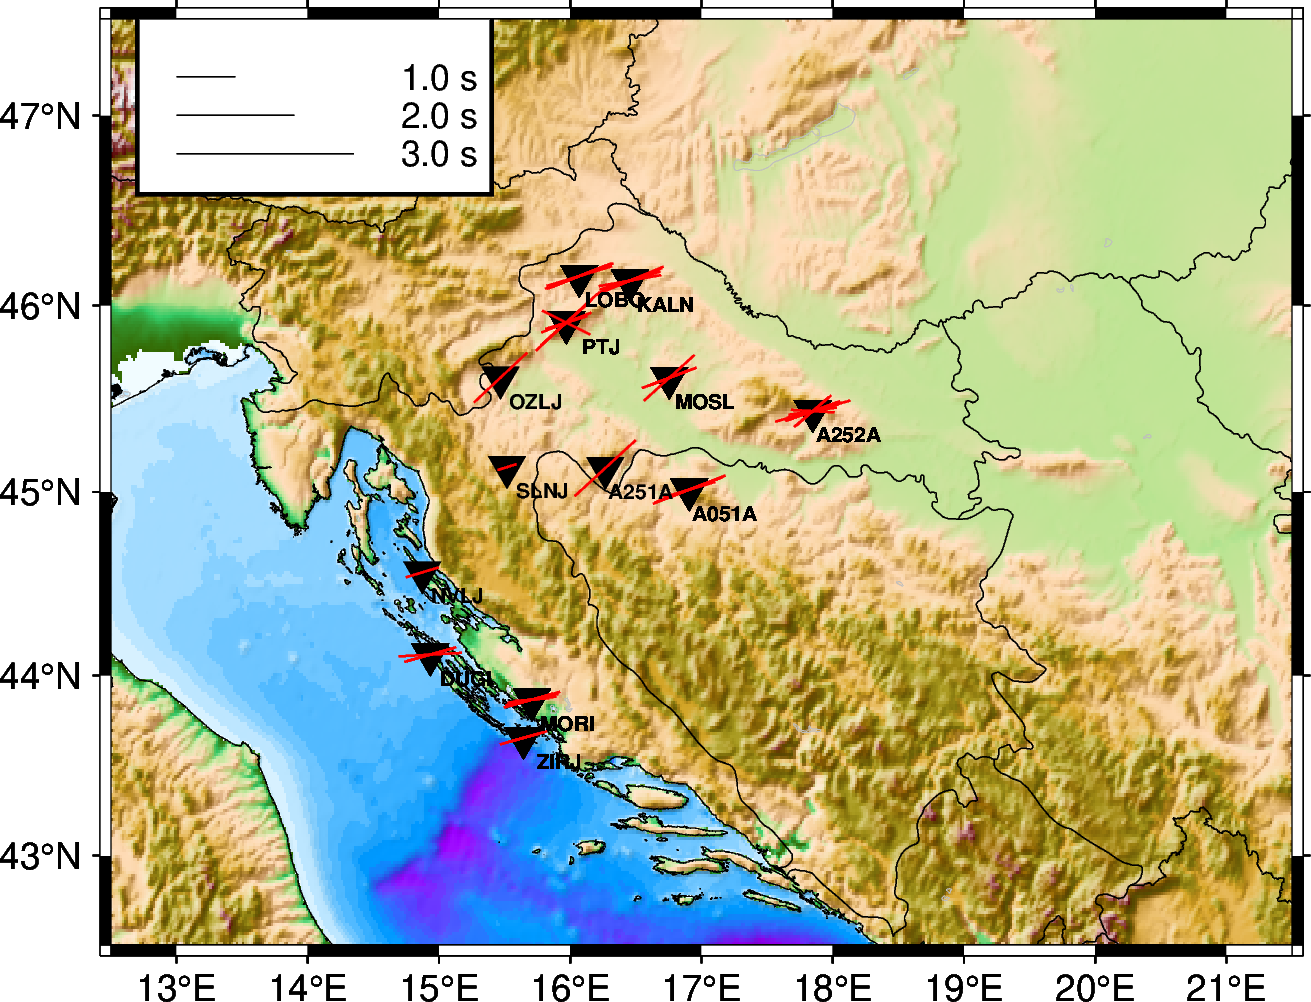

In [16]:
plot_splitting_map(df_category_good_only, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="0.5p",
                   proj="M10c", figname=r'Filter_8-20s_SNR_4_tw_50\8-20s_SNR_4_good_only.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='red')

Samo dobri rezultati splittinga

2 0.2


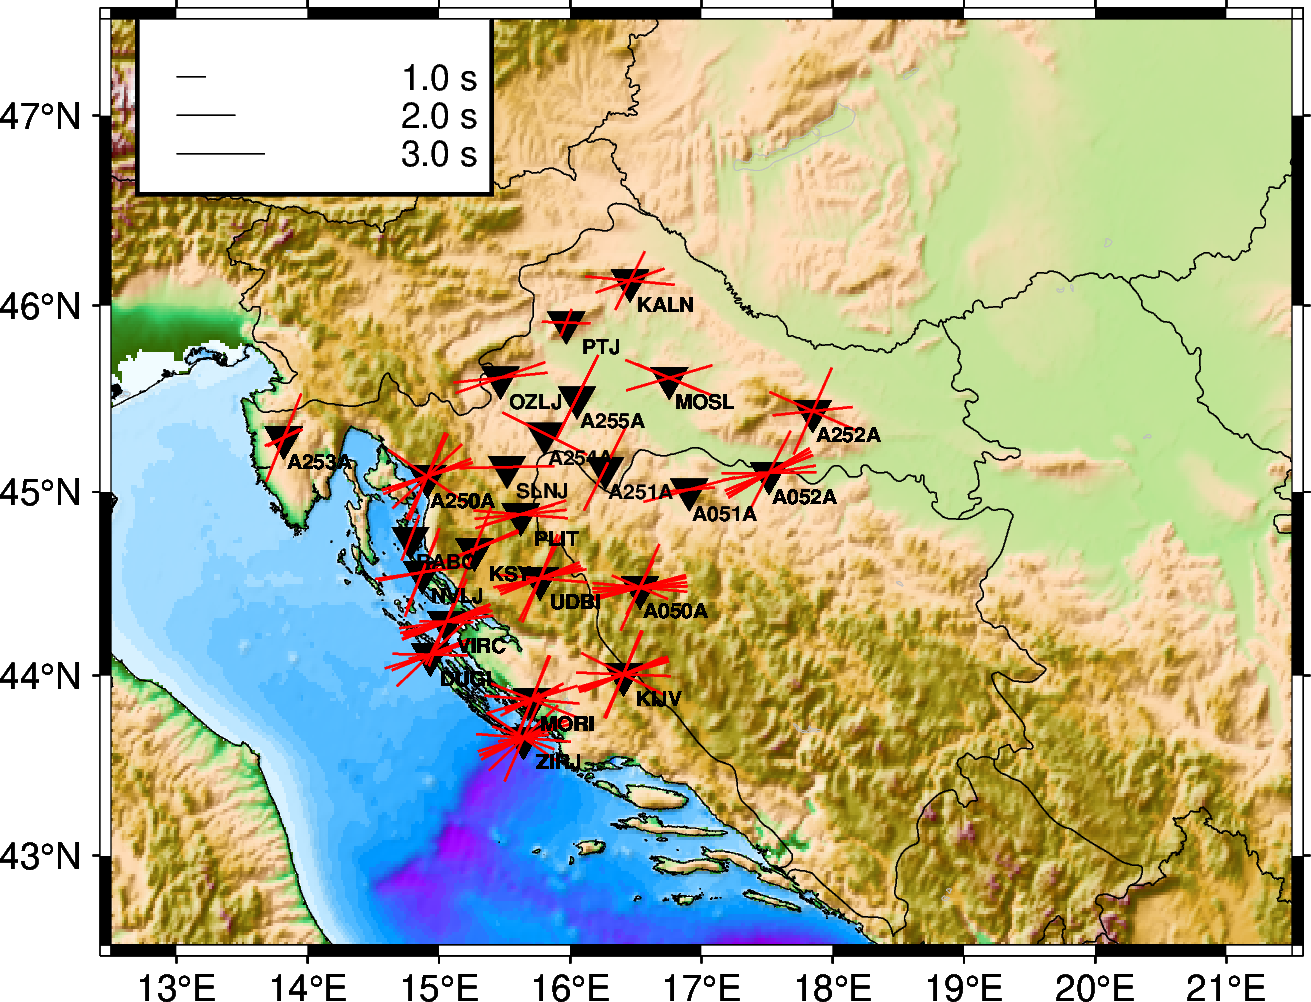

In [17]:
plot_splitting_map(dfdata_null, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.25, penwidth="0.5p",
                   proj="M10c", figname=r'Filter_8-20s_SNR_4_tw_50\8-20s_SNR_4_null.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='red')

Null rezultati

In [18]:
def plot_splitting_map_gray(sks_meas_all, boxcoordinates,
                       dcoord=0.5,
                       figname='splitting_map.png',
                       frame=["a1f0.25", "WSen"],
                       topo_data="@earth_relief_01m",
                       colormap="etopo1",
                       proj="M5c",
                       markerstyle="cc",
                       markersizescale=0.03*2,
                       markerstyle_nocmap="c0.25c",
                       markercolor="blue",
                       pencolor='black',
                       penwidth="1p",
                       dtscale=0.5,
                       measurement_cmap=True,
                       markercolormap="viridis",
                       colorbar=True,
                      legend=True):
    '''
    Plot the shear wave splitting measurements using pygmt
    param sks_meas_all: pandas dataframe with `Longitude`, `Latitude`, `phi`, and `dt` columns.
    param boxcoordinates: list with minimum longitude, maximum longitude, minimum latitude, maximum latitude
    param dcoord: offset of the map from the given coordinates
    param figname: output figure name
    param topo_data: topographic data str
    param colormap: colormap for the topographic data. Defaults to None
    param proj: projection of the map
    param measurement_cmap: boolean. plot markers using the colormap
    param markerstyle: marker style for colormapped markers
    param markerstyle_nocmap: marker style without colormap
    param markercolor: marker color without colormap
    param pencolor: pen color for the splitting lines
    param dtscale: scale for delay time on the map
    '''
    minlon, maxlon = boxcoordinates[0], boxcoordinates[1]
    minlat, maxlat = boxcoordinates[2], boxcoordinates[3]
    minlon, maxlon, minlat, maxlat = (
        minlon - dcoord,
        maxlon + dcoord,
        minlat - dcoord,
        maxlat + dcoord,
    )

    res = "f"
    grid = pygmt.datasets.load_earth_relief(resolution="01m", region=boxcoordinates)
    dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 45])

    fig = pygmt.Figure()
    # define figure configuration
    pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

    fig.shift_origin(xshift="12.5c")

    pygmt.makecpt(cmap=colormap, series=[-2, 0.3, 0.01])
    fig.grdimage(
        grid=dgrid,
        projection="M12c",
        frame=["a1f0.25", "WSen"],
        cmap=True,
        I = True
    )
    
    fig.coast( 
        water='lightblue', 
        shorelines=True
    )

    phivals = 90-sks_meas_all['phi'].values
    dtvals = dtscale*sks_meas_all['dt'].values
    
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor ,
        direction=[
            phivals,
            dtvals/2,        # skaliranje brzih osi sa obzirom na vrijeme 
        ],  # angle (from xaxis) and magnitude
    )
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor , 
        direction=[
            180+phivals,
            dtvals/2,        # skaliranje brzih osi sa obzirom na vrijeme
        ],  # angle (from xaxis) and magnitude

    )

    if legend:
        delaytimearrays = [1.0, 2.0, 3.0]
        ydiff = 0.2
        xdiff = 1.5
        yloc = (maxlat-dcoord+2*ydiff)
        xloc = minlon+dcoord
        
        xloc=13.5
        yloc = 47
        fig.plot(x=xloc+xdiff/2+0.05, y=yloc-len(delaytimearrays)/2*ydiff-0.05, style=f"r{len(delaytimearrays)}/{len(delaytimearrays)/2}",
                 color="white", pen="1p,black")

        xloc += xdiff
        for dltime in delaytimearrays:
            yloc -= ydiff
            fig.plot(
                x=xloc-xdiff,
                y=yloc,
                style="v0i+e",
                pen='1p,blue',
                direction=[
                    [0],
                    [dtscale*dltime],
                ],  # angle (from xaxis) and magnitude
            )
            fig.text(x=xloc, y=yloc,
                     text=f"{dltime} s", font="0.3c,Helvetica")

    fig.show()
    fig.savefig(figname, crop=True, dpi=1080)

C:\Users\dodos\AppData\Local\Temp\ipykernel_10124\64919770.py:55: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(


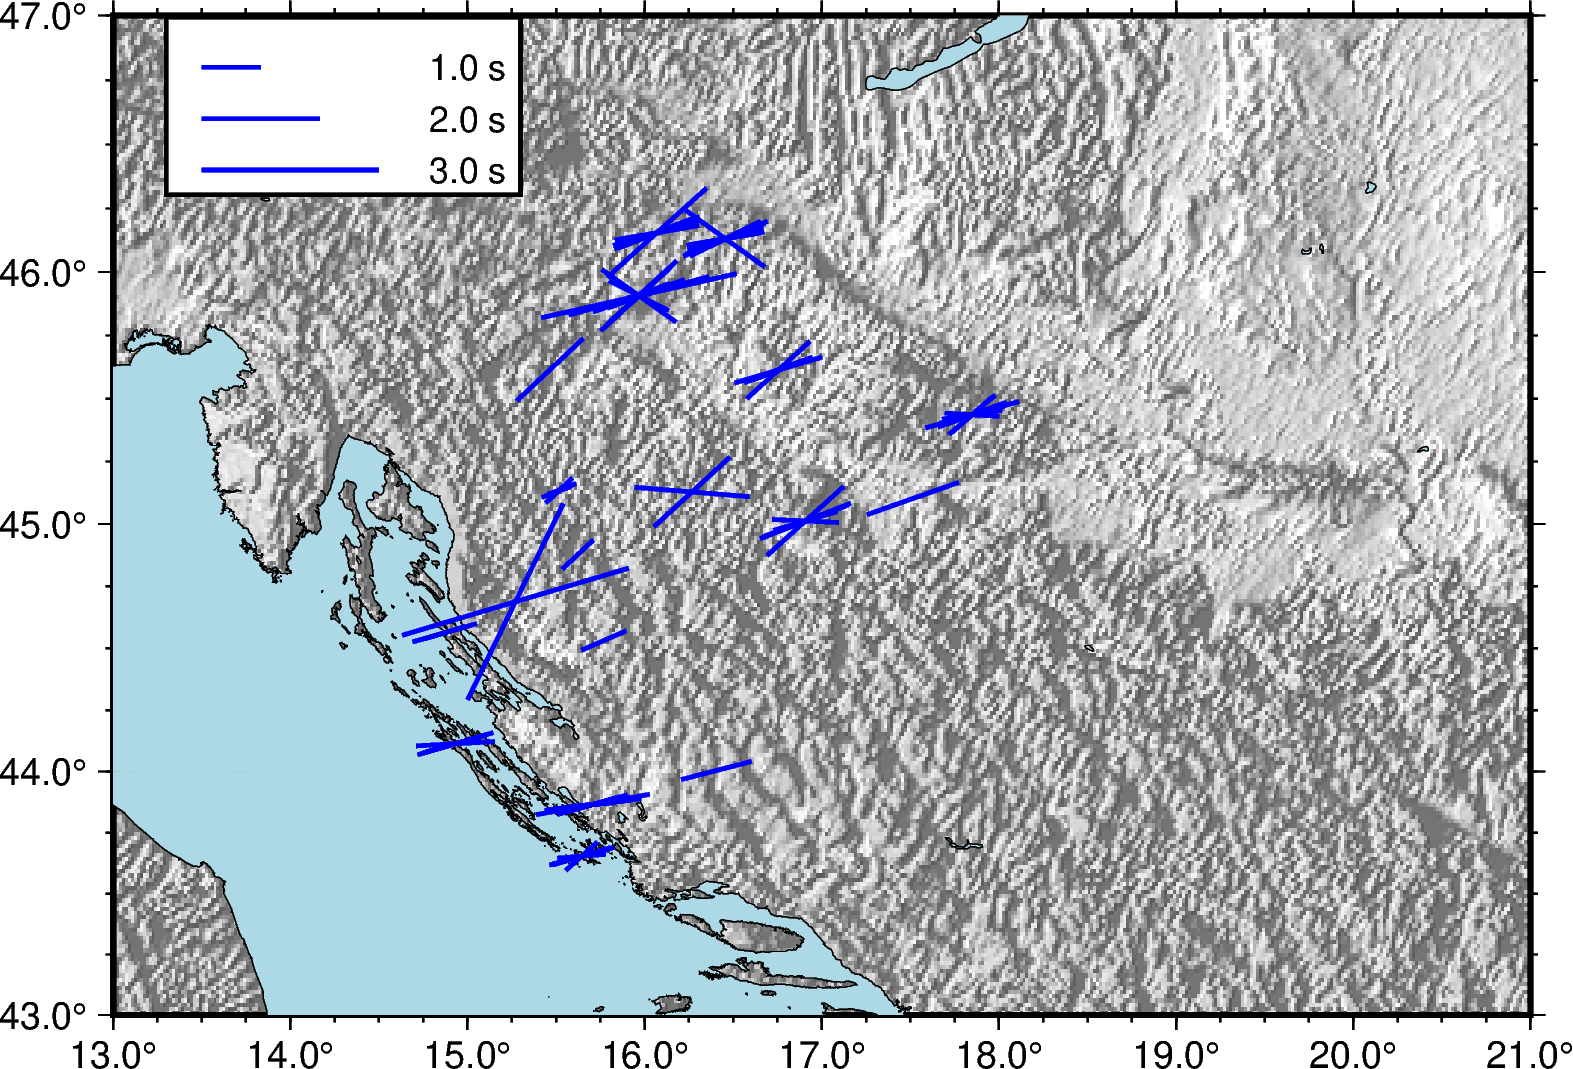

In [21]:
minlon, maxlon = 13, 21
minlat, maxlat = 43, 47

plot_splitting_map_gray(df_category_good, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="1p",
                   proj="M10c", figname=r'Filter_8-20s_SNR_4_tw_50\8-20s_SNR_4_good_average_grayscale.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='gray', pencolor='blue')

Dobri i prosijecni rezultati

C:\Users\dodos\AppData\Local\Temp\ipykernel_10124\64919770.py:55: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(


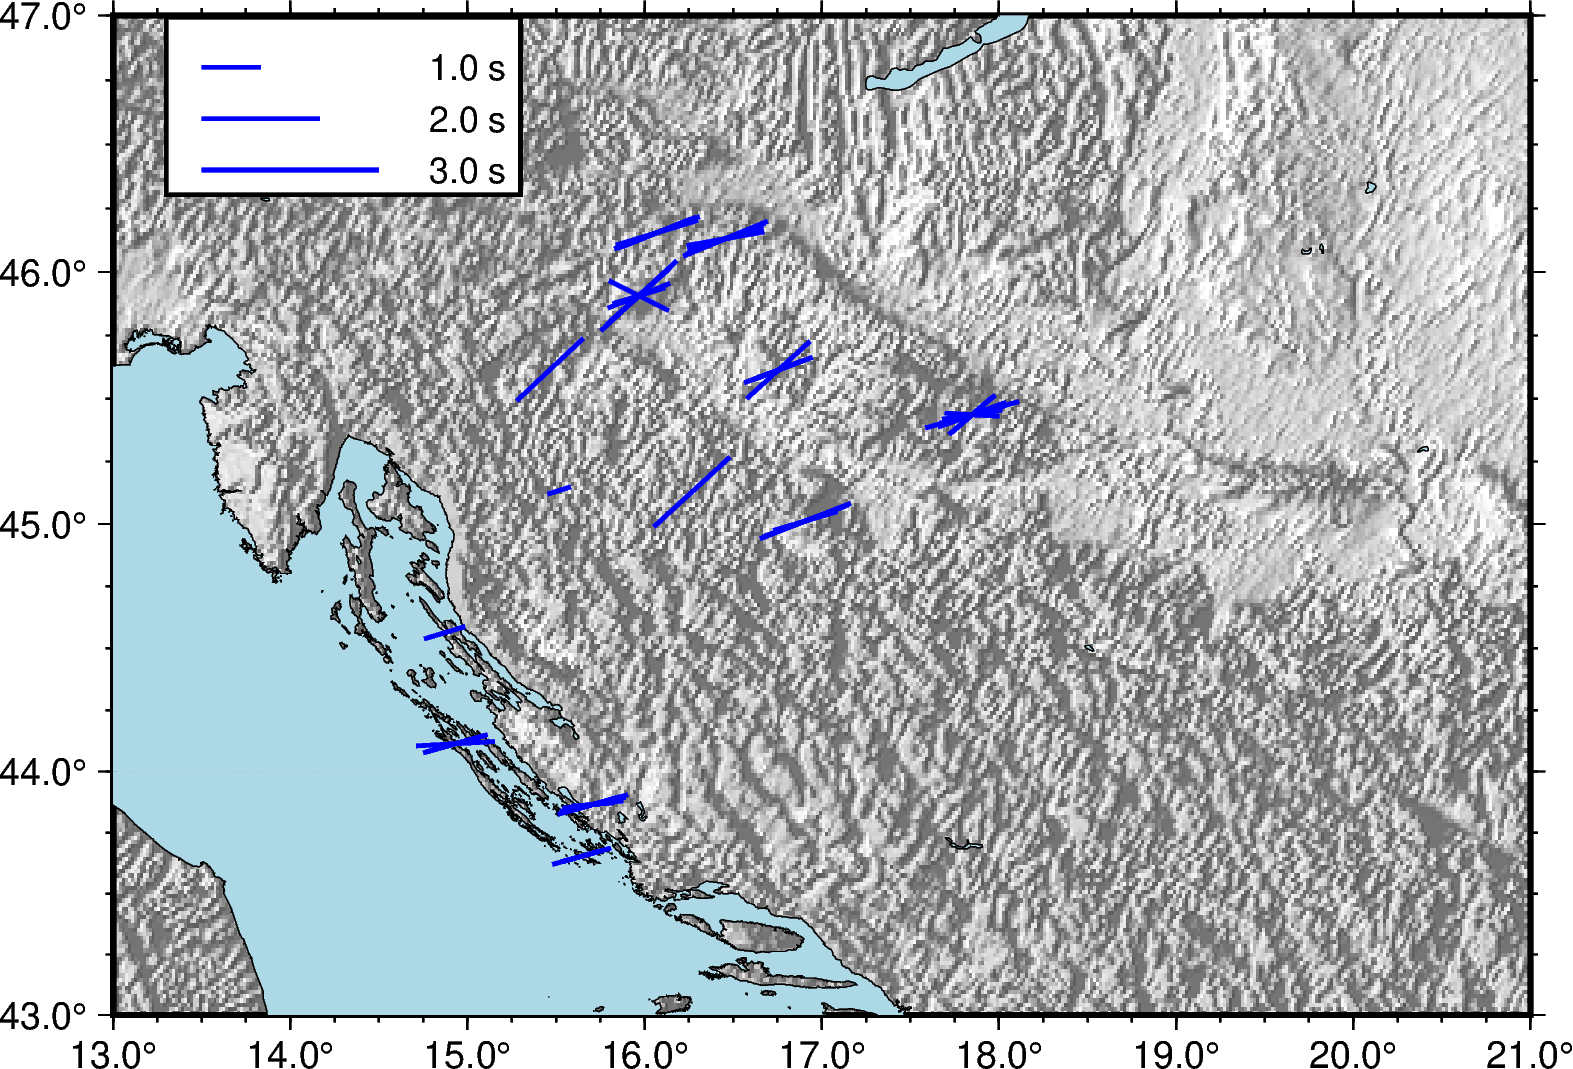

In [22]:
plot_splitting_map_gray(df_category_good_only, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="1p",
                   proj="M10c", figname=r'Filter_8-20s_SNR_4_tw_50\8-20s_SNR_4_good_average_grayscale.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='gray', pencolor='blue')
    

samo dobri rezultati

C:\Users\dodos\AppData\Local\Temp\ipykernel_10124\64919770.py:55: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(


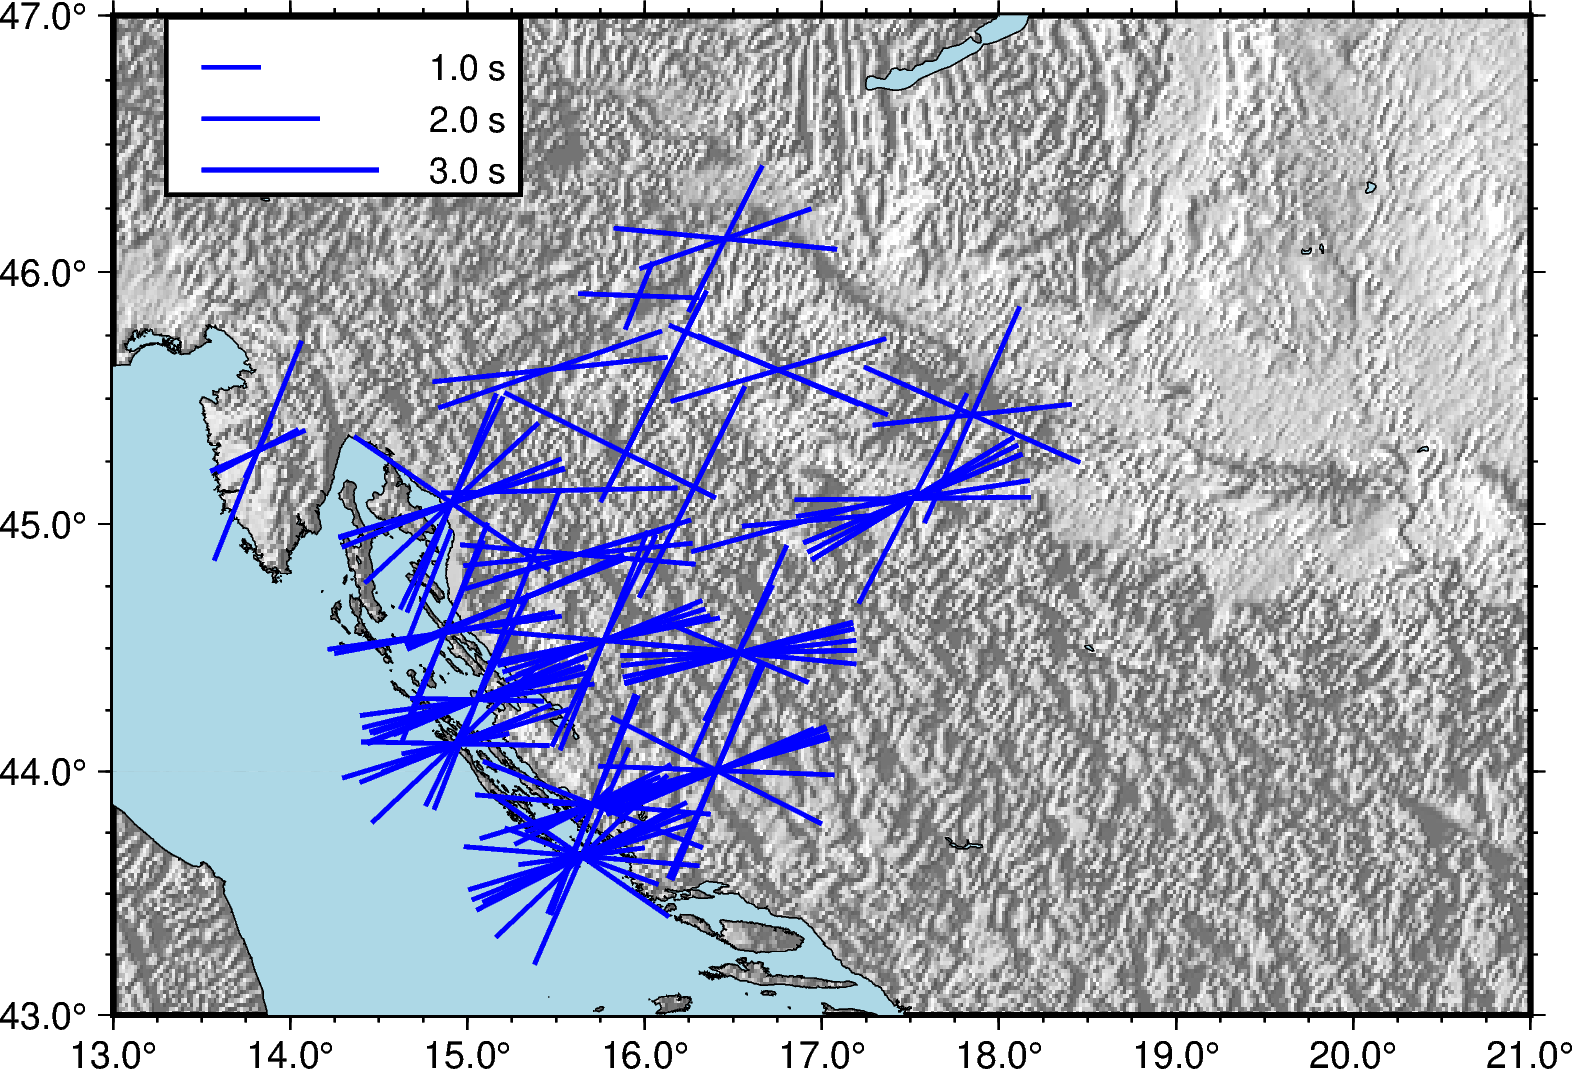

In [23]:
plot_splitting_map_gray(dfdata_null, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="1p",
                   proj="M10c", figname=r'Filter_8-20s_SNR_4_tw_50\8-20s_SNR_4_null_grayscale.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='gray', pencolor='blue')

Null rezultati

In [24]:
def plot_splitting_map_gray_dt(sks_meas_all, boxcoordinates,
                       dcoord=0.5,
                       figname='splitting_map.png',
                       frame=["a1f0.25", "WSen"],
                       topo_data="@earth_relief_01m",
                       colormap="etopo1",
                       proj="M5c",
                       markerstyle="cc",
                       markersizescale=0.03*2,
                       markerstyle_nocmap="c0.25c",
                       markercolor="blue",
                       pencolor='black',
                       penwidth="1p",
                       dtscale=0.5,
                       measurement_cmap=True,
                       markercolormap="viridis",
                       colorbar=True,
                      legend=True):
    '''
    Plot the shear wave splitting measurements using pygmt
    param sks_meas_all: pandas dataframe with `Longitude`, `Latitude`, `phi`, and `dt` columns.
    param boxcoordinates: list with minimum longitude, maximum longitude, minimum latitude, maximum latitude
    param dcoord: offset of the map from the given coordinates
    param figname: output figure name
    param topo_data: topographic data str
    param colormap: colormap for the topographic data. Defaults to None
    param proj: projection of the map
    param measurement_cmap: boolean. plot markers using the colormap
    param markerstyle: marker style for colormapped markers
    param markerstyle_nocmap: marker style without colormap
    param markercolor: marker color without colormap
    param pencolor: pen color for the splitting lines
    param dtscale: scale for delay time on the map
    '''
    minlon, maxlon = boxcoordinates[0], boxcoordinates[1]
    minlat, maxlat = boxcoordinates[2], boxcoordinates[3]
    minlon, maxlon, minlat, maxlat = (
        minlon - dcoord,
        maxlon + dcoord,
        minlat - dcoord,
        maxlat + dcoord,
    )

    res = "f"
    grid = pygmt.datasets.load_earth_relief(resolution="01m", region=boxcoordinates)
    dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 45])

    fig = pygmt.Figure()
    # define figure configuration
    pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

    fig.shift_origin(xshift="12.5c")

    pygmt.makecpt(cmap=colormap, series=[-2, 0.3, 0.01])
    fig.grdimage(
        grid=dgrid,
        projection="M12c",
        frame=["a1f0.25", "WSen"],
        cmap=True,
        I = True
    )
    
    fig.coast( 
        water='lightblue', 
        shorelines=True
    )

    phivals = 90-sks_meas_all['phi'].values
    dtvals = dtscale*sks_meas_all['dt'].values
    print(len(dtvals))
    quantity = 0.1*sks_meas_all['nr_results'].values
    print(len(quantity))
    
    if measurement_cmap:
        pygmt.makecpt(cmap=markercolormap, series=[
            round(sks_meas_all['dt'].min()-0.05, 1), round(sks_meas_all['dt'].max()+0.05, 1)])
     #   fig.plot(
     #           x=sks_meas_all['Longitude'],
     #           y=sks_meas_all['Latitude'],
     #           size=markersizescale*2**dtvals,
     #           color=sks_meas_all['dt'],
     #           cmap=True,
     #           style=markerstyle,
     #           pen="black",
     #        )

    
        fig.plot(
             x=sks_meas_all['Longitude'],
             y=sks_meas_all['Latitude'],
             #size=markersizescale*2**sks_meas_all['nr_results'],
             size=markersizescale*2**quantity,#*2**sks_meas_all['nr_results'],
             color=sks_meas_all["nr_results"],#np.full(len(sks_meas_all["nr_results"]), 2),
             cmap=True,
             style=markerstyle,
             pen="black",
            )
        
    else:
        fig.plot(
            x=sks_meas_all['Longitude'].values,
            y=sks_meas_all['Latitude'].values,
            style=markerstyle_nocmap,
            color=markercolor,
            pen="black",
            label="Station",
        )
    
    
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor ,
        direction=[
            phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme 
        ],  # angle (from xaxis) and magnitude
    )
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor , 
        direction=[
            180+phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme
        ],  # angle (from xaxis) and magnitude

    )

    if legend:
        delaytimearrays = [1.0, 2.0, 3.0]
        ydiff = 0.2
        xdiff = 1.5
        yloc = (maxlat-dcoord+2*ydiff)
        xloc = minlon+dcoord
        
        xloc=13.5
        yloc = 47
        fig.plot(x=xloc+xdiff/2+0.05, y=yloc-len(delaytimearrays)/2*ydiff-0.05, 
                 style=f"r{len(delaytimearrays)}/{len(delaytimearrays)/2}",
                 color="white", pen="1p,black")

        xloc += xdiff
        for dltime in delaytimearrays:
            yloc -= ydiff
            fig.plot(
                x=xloc-xdiff,
                y=yloc,
                style="v0i+e",
                pen='1p,'+pencolor,
                direction=[
                    [0],
                    [dtscale*dltime],
                ],  # angle (from xaxis) and magnitude
            )
            fig.text(x=xloc, y=yloc,
                     text=f"{dltime} s", font="0.3c,Helvetica")
    if colorbar:
        fig.colorbar(frame=["a0.5", "y+lnr_measurement"])
        fig.savefig(figname, crop=True, dpi=300)

    fig.show()
    fig.savefig(figname, crop=True, dpi=1080)


C:\Users\dodos\AppData\Local\Temp\ipykernel_10124\1355136092.py:55: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(


55
55


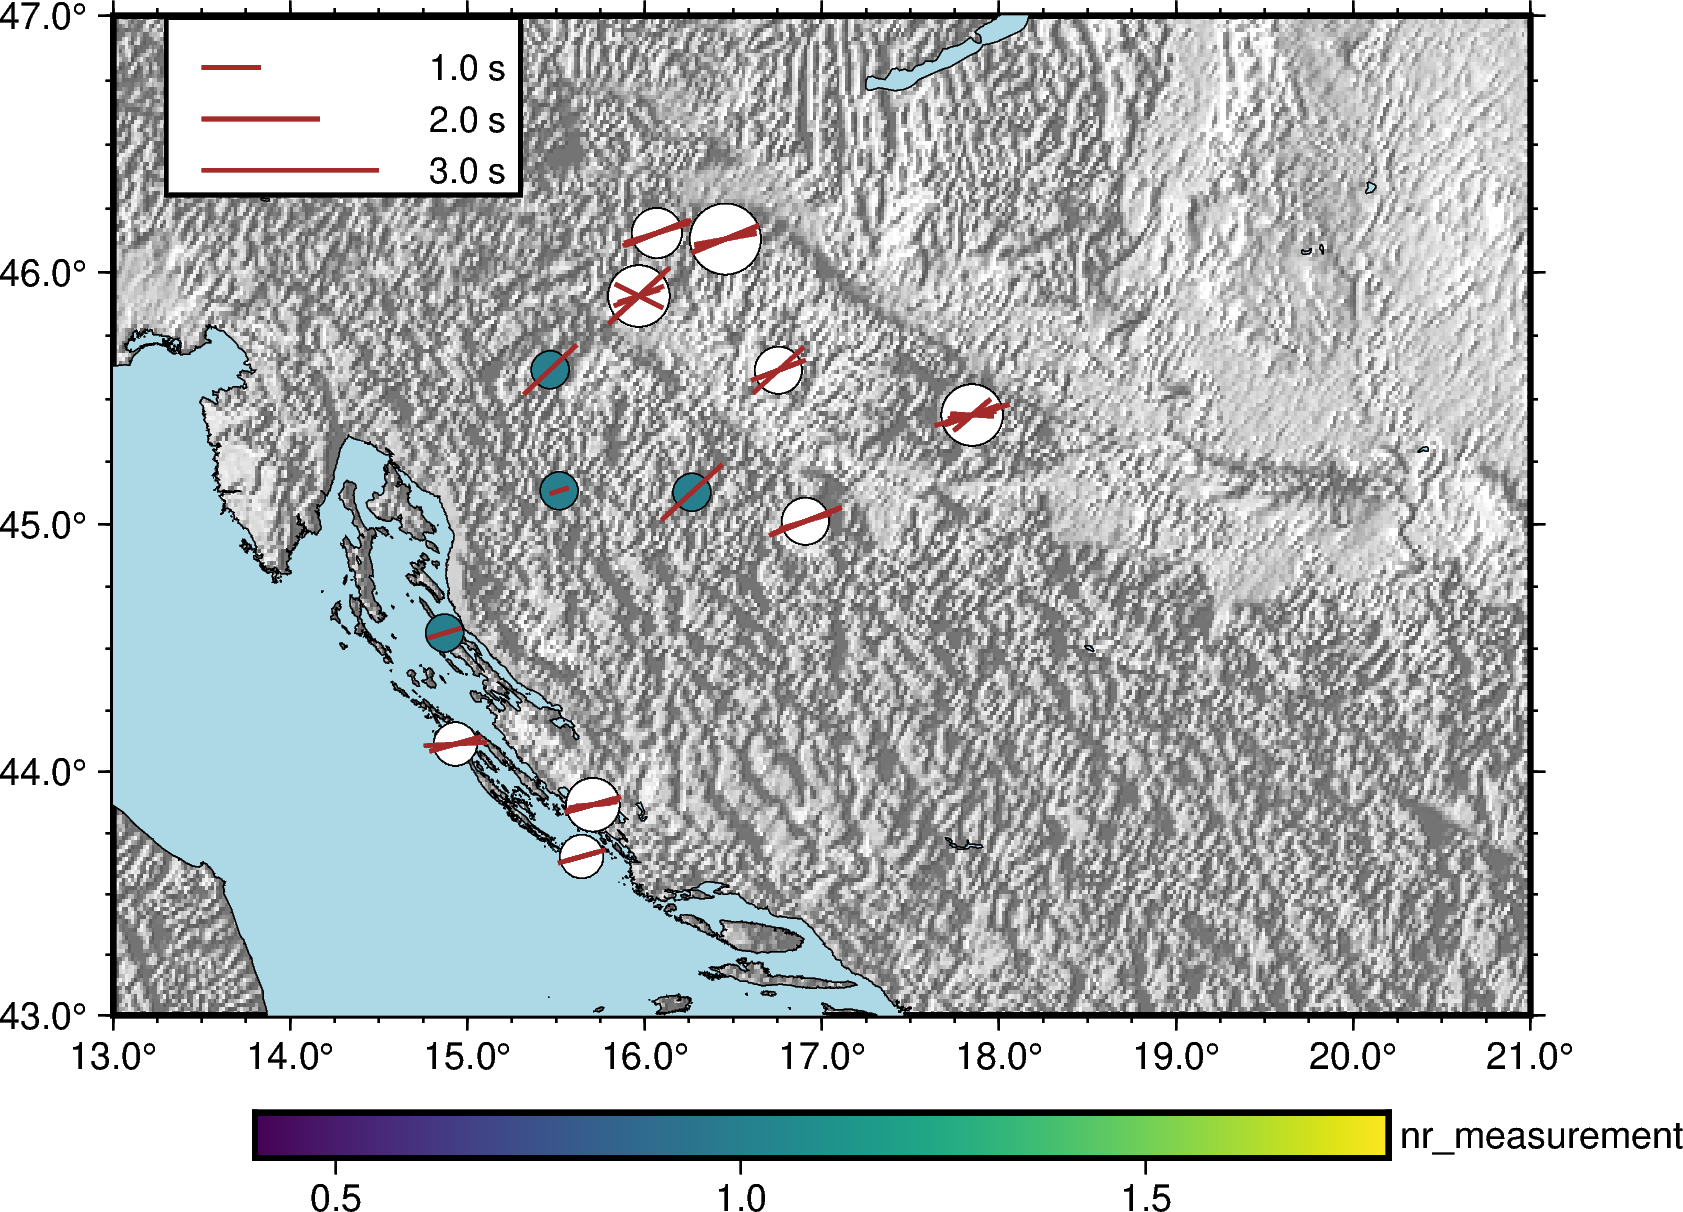

In [25]:
number_of_results = []
for index, row in df_category_good_only.iterrows():
    number_of_results.append(len(df_category_good_only.loc[df_category_good_only['Station'] == row['Station']]))

df_category_good_only['nr_results'] = number_of_results

plot_splitting_map_gray_dt(df_category_good_only, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="1p",
                   proj="M10c", figname=r'Filter_8-20s_SNR_4_tw_50\8-20s_SNR_4_good_only_marker.png', frame=["a1f1", "WSen"],
                   markersizescale=0.3, colormap='gray', pencolor='brown')

In [26]:
## ne koristim 

import numpy as np
station_averages = {}
x=0
y=0
for station in stations['Name']:
    x=0
    y=0
    summ=0
    counter=0
    for phi in df_category_good.loc[df_category_good['Station'] == station]['phi']:
        x += np.sin(np.deg2rad(phi))
        y += np.sin(np.deg2rad(phi))
        if phi > 180:
            phi=phi-180
        summ+=phi
        counter+=1
    if counter > 0:    
        station_averages[station] = summ/counter
    else:
        station_averages[station] = np.nan
print(station_averages)

{'A250A': nan, 'A251A': 71.07894000000002, 'A252A': 71.528823, 'A253A': nan, 'A254A': nan, 'A255A': nan, 'A050A': nan, 'A051A': 70.41504428571429, 'A052A': 70.55087, 'MOSL': 66.97023285714285, 'DUGI': 77.235745, 'KALN': 75.97077571428572, 'KIJV': 75.44564, 'KSY': 49.74083, 'LOBO': 68.8670575, 'MORI': 79.53421555555556, 'NVLJ': 73.632035, 'OZLJ': 46.85833, 'PLIT': 46.61234, 'PTJ': 73.96067533333334, 'RABC': nan, 'SLNJ': 62.432813333333335, 'UDBI': 66.47371999999999, 'VIRC': nan, 'ZIRJ': 72.12162857142857}


In [27]:
def plot_splitting_map_average(figure,sks_meas_all, boxcoordinates,
                       dcoord=0.5,
                       figname='splitting_map.png',
                       frame=["a1f0.25", "WSen"],
                       topo_data="@earth_relief_01m",
                       colormap="etopo1",
                       proj="M5c",
                       markerstyle="cc",
                       markersizescale=0.03*2,
                       markerstyle_nocmap="c0.25c",
                       markercolor="blue",
                       pencolor='black',
                       penwidth="1p",
                       dtscale=0.5,
                       measurement_cmap=True,
                       markercolormap="viridis",
                       colorbar=True,
                      legend=True):
    '''
    Plot the shear wave splitting measurements using pygmt
    param sks_meas_all: pandas dataframe with `Longitude`, `Latitude`, `phi`, and `dt` columns.
    param boxcoordinates: list with minimum longitude, maximum longitude, minimum latitude, maximum latitude
    param dcoord: offset of the map from the given coordinates
    param figname: output figure name
    param topo_data: topographic data str
    param colormap: colormap for the topographic data. Defaults to None
    param proj: projection of the map
    param measurement_cmap: boolean. plot markers using the colormap
    param markerstyle: marker style for colormapped markers
    param markerstyle_nocmap: marker style without colormap
    param markercolor: marker color without colormap
    param pencolor: pen color for the splitting lines
    param dtscale: scale for delay time on the map
    '''
    minlon, maxlon = boxcoordinates[0], boxcoordinates[1]
    minlat, maxlat = boxcoordinates[2], boxcoordinates[3]
    minlon, maxlon, minlat, maxlat = (
        minlon - dcoord,
        maxlon + dcoord,
        minlat - dcoord,
        maxlat + dcoord,
    )

    phivals = 90-sks_meas_all['phi'].values
    dtvals = dtscale*sks_meas_all['dt'].values
    fig = figure
    
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor ,
        direction=[
            phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme 
        ],  # angle (from xaxis) and magnitude
    )
    fig.plot(
        x=sks_meas_all['Longitude'],
        y=sks_meas_all['Latitude'],
        style="v0i+e",
        pen=penwidth+","+pencolor , 
        direction=[
            180+phivals,
            dtvals/2.5,        # skaliranje brzih osi sa obzirom na vrijeme
        ],  # angle (from xaxis) and magnitude

    )

    if legend:
        delaytimearrays = [1.0, 2.0, 3.0]
        ydiff = 0.2
        xdiff = 2
        yloc = (maxlat-dcoord+2*ydiff)
        xloc = minlon+dcoord
        fig.plot(x=xloc+xdiff/2+0.05, y=yloc-len(delaytimearrays)/2*ydiff-0.05, style=f"r{len(delaytimearrays)}/{len(delaytimearrays)/2}",
                 color="white", pen="1p,black")

        xloc += xdiff
        for dltime in delaytimearrays:
            yloc -= ydiff
            fig.plot(
                x=xloc-xdiff,
                y=yloc,
                style="v0i+e",
                pen='black',
                direction=[
                    [0],
                    [dtscale*dltime],
                ],  # angle (from xaxis) and magnitude
            )
            fig.text(x=xloc, y=yloc,
                     text=f"{dltime} s", font="0.3c,Helvetica")
    return fig


In [28]:
import numpy as np
import pycircstat as pc

In [29]:
test = df_category_good.loc[df_category_good['Station'] == 'ZIRJ']['phi']
test_dict = {'Station':[], 'phi':[]}
for value in test:
    test_dict['Station'].append('MOSL')
    if value > 180:
        test_dict['phi'].append(value-180)
    else:
        test_dict['phi'].append(value)
test=pd.DataFrame.from_dict(test_dict)
print(test)

  Station       phi
0    MOSL  74.28442
1    MOSL  48.14884
2    MOSL  74.75172
3    MOSL  85.39084
4    MOSL  73.30028
5    MOSL  74.96831
6    MOSL  74.00699


In [30]:
station_averages_dict = {'Station':[],'Latitude':[],'Longitude':[], 'phi':[], 'sigma_phi':[], 'dt':[], 'sigma_dt':[]}
for index,row in stations.iterrows():
    station_averages_dict['Station'].append(row['Name'])
    station_averages_dict['Latitude'].append(row['latitude'])
    station_averages_dict['Longitude'].append(row['longitude'])
    
    mean = np.rad2deg(pc.mean(np.deg2rad(df_category_good.loc[df_category_good['Station'] == row['Name']]['phi'])))
    station_averages_dict['phi'].append(mean)
    
    phi_vals = df_category_good.loc[df_category_good['Station'] == row['Name']]['phi']
    std = np.sqrt( pc.std(np.deg2rad(phi_vals)) ) # pc.std vraca varijancu
    res = np.rad2deg( std )
    station_averages_dict['sigma_phi'].append(res)
    
    station_averages_dict['dt'].append( np.mean(df_category_good.loc[df_category_good['Station'] == row['Name'] ]['dt']) )
    
    station_averages_dict['sigma_dt'].append(np.std(df_category_good.loc[df_category_good['Station'] == row['Name'] ]['dt']))

C:\Users\dodos\anaconda3\envs\pygmt\lib\site-packages\pycircstat\descriptive.py:339: RuntimeWarning: invalid value encountered in cdouble_scalars
  return ((w * np.exp(1j * alpha * axial_correction)).sum(axis=axis) /


In [31]:
station_averages = pd.DataFrame(station_averages_dict, columns=['Station', 'Latitude', 'Longitude', "phi", "sigma_phi", "dt"
                                                                , "sigma_dt"])

station_averages['Latitude'] = pd.to_numeric(station_averages['Latitude'], errors='coerce')
station_averages['Longitude'] = pd.to_numeric(station_averages['Longitude'], errors='coerce')
station_averages['phi'] = pd.to_numeric(station_averages['phi'], errors='coerce')
station_averages['sigma_phi'] = pd.to_numeric(station_averages['sigma_phi'], errors='coerce')
station_averages['dt'] = pd.to_numeric(station_averages['dt'], errors='coerce')    
station_averages['sigma_dt'] = pd.to_numeric(station_averages['sigma_dt'], errors='coerce')    

In [32]:
station_averages.to_csv('station_averages.csv', sep='\t')

In [33]:
grid = pygmt.datasets.load_earth_relief(resolution="01m", region=[12, 20, 42, 47])
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 45])

C:\Users\dodos\AppData\Local\Temp\ipykernel_10124\4241357571.py:9: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(
plot [WARNING]: Vector length = NaN near line 1. Skipped
plot [WARNING]: Vector length = NaN near line 4. Skipped
plot [WARNING]: Vector length = NaN near line 5. Skipped
plot [WARNING]: Vector length = NaN near line 6. Skipped
plot [WARNING]: Vector length = NaN near line 7. Skipped
plot [WARNING]: Vector length = NaN near line 21. Skipped
plot [WARNING]: Vector length = NaN near line 24. Skipped
plot [WARNING]: Vector length = NaN near line 1. Skipped
plot [WARNING]: Vector length = NaN near line 4. Skipped
plot [WARNING]: Vector length = NaN near line 5. Skipped
plot [WARNING]: Vector length = NaN near line 6. Skipped
plot [WARNING]: Vector length = NaN near line 7. Skipped
plot [WARNING]: Vector length = NaN near line 21. Skipped
plot [WARNING]: Vector length = NaN near line 24. Skipped


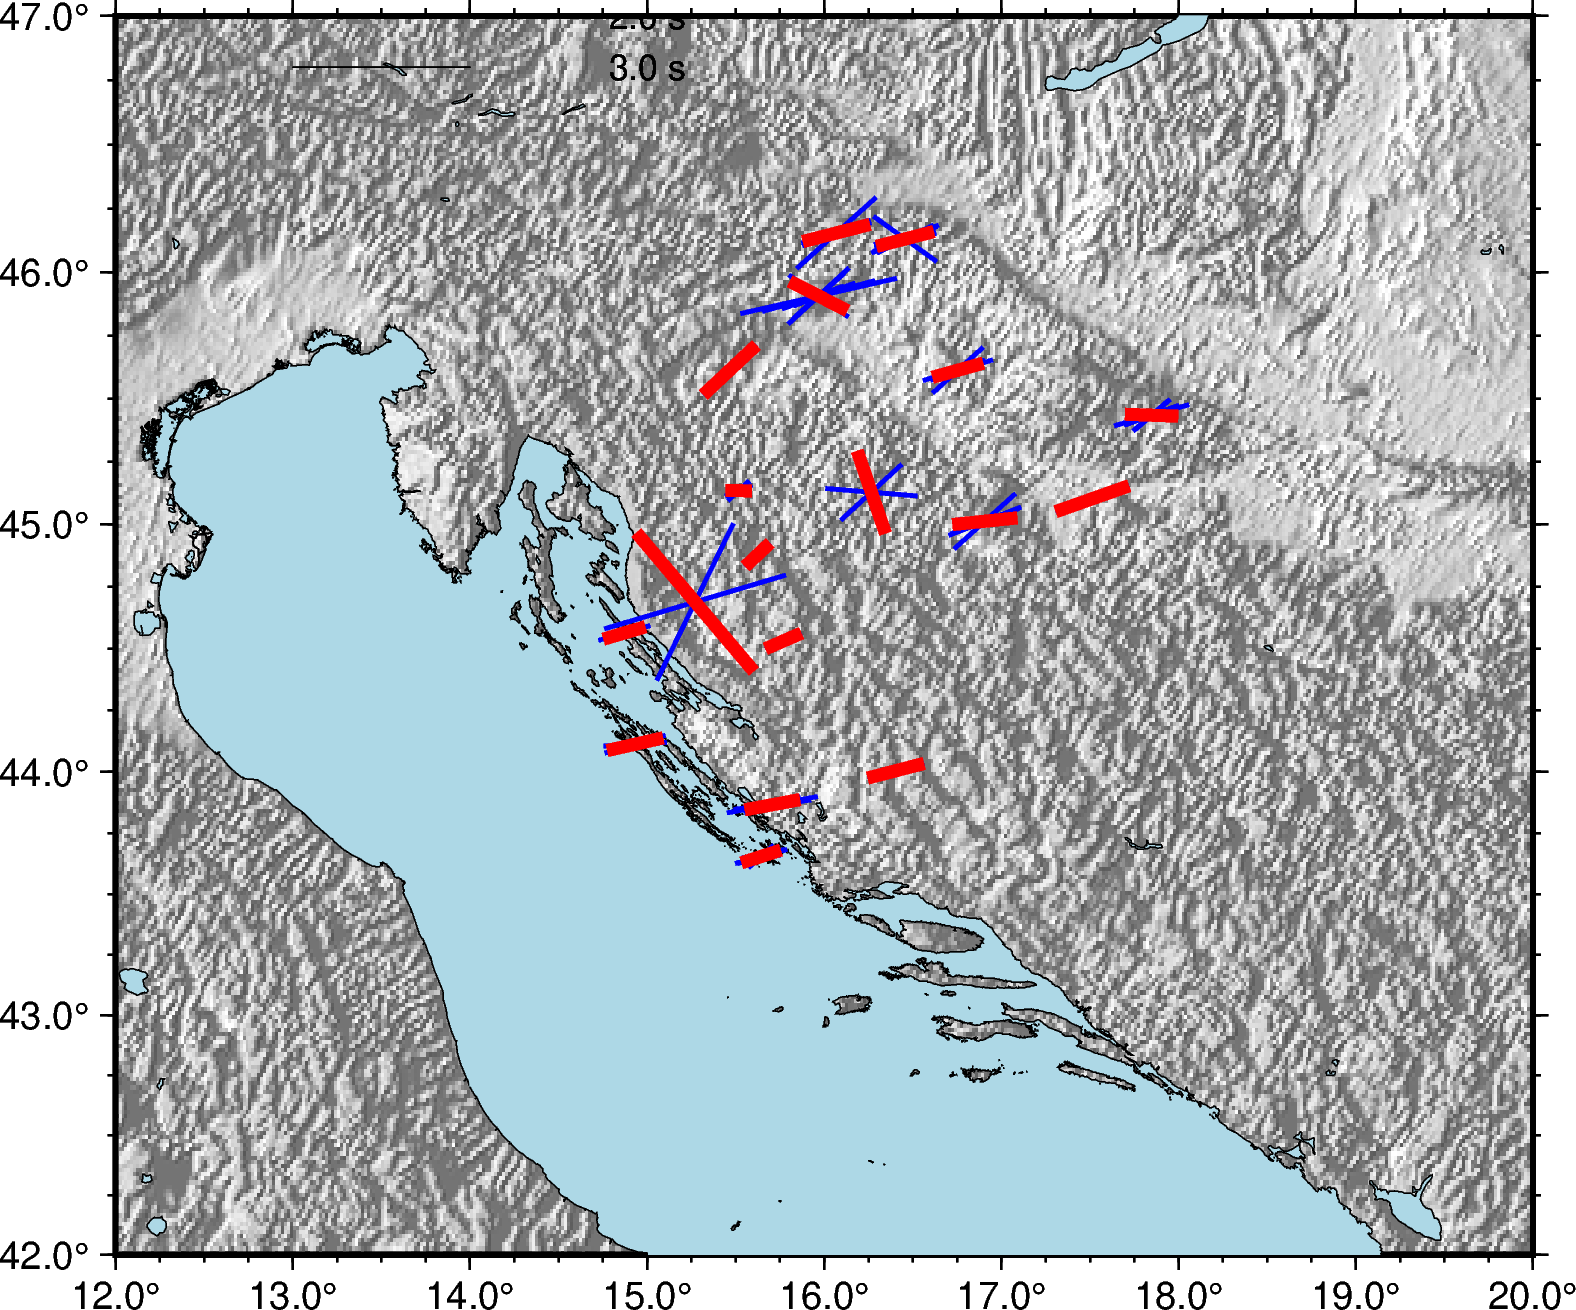

In [34]:
fig = pygmt.Figure()
res = "f"

pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

fig.shift_origin(xshift="12.5c")

pygmt.makecpt(cmap="gray", series=[-2, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    frame=["a1f0.25", "WSen"],
    cmap=True,
    I = True
    )
    
fig.coast( 
        water='lightblue', 
        shorelines=True
    )
fig_one = plot_splitting_map_average(fig, df_category_good, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="1p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='blue')
plot_splitting_map_average(fig_one, station_averages, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="3p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='globe', pencolor='red')
fig_one.show()

In [35]:
station_averages_dict = {'Station':[],'Latitude':[],'Longitude':[], 'phi':[], 'sigma_phi':[], 'dt':[], 'sigma_dt':[]}
for index,row in stations.iterrows():
    station_averages_dict['Station'].append(row['Name'])
    station_averages_dict['Latitude'].append(row['latitude'])
    station_averages_dict['Longitude'].append(row['longitude'])
    
    mean = np.rad2deg(pc.mean(np.deg2rad(df_category_good_only.loc[df_category_good_only['Station'] == row['Name']]['phi'])))
    station_averages_dict['phi'].append(mean)
    
    phi_vals = df_category_good_only.loc[df_category_good_only['Station'] == row['Name']]['phi']
    std = np.sqrt( pc.std(np.deg2rad(phi_vals)) ) # pc.std vraca varijancu
    res = np.rad2deg( std )
    station_averages_dict['sigma_phi'].append(res)
    
    station_averages_dict['dt'].append( np.mean(df_category_good_only.loc[df_category_good_only['Station'] == row['Name'] ]['dt']) )
    
    station_averages_dict['sigma_dt'].append(np.std(df_category_good_only.loc[df_category_good_only['Station'] == row['Name'] ]['dt']))

C:\Users\dodos\anaconda3\envs\pygmt\lib\site-packages\pycircstat\descriptive.py:339: RuntimeWarning: invalid value encountered in cdouble_scalars
  return ((w * np.exp(1j * alpha * axial_correction)).sum(axis=axis) /


In [36]:
station_averages = pd.DataFrame(station_averages_dict, columns=['Station', 'Latitude', 'Longitude', "phi", "sigma_phi", "dt"
                                                                , "sigma_dt"])

station_averages['Latitude'] = pd.to_numeric(station_averages['Latitude'], errors='coerce')
station_averages['Longitude'] = pd.to_numeric(station_averages['Longitude'], errors='coerce')
station_averages['phi'] = pd.to_numeric(station_averages['phi'], errors='coerce')
station_averages['sigma_phi'] = pd.to_numeric(station_averages['sigma_phi'], errors='coerce')
station_averages['dt'] = pd.to_numeric(station_averages['dt'], errors='coerce')    
station_averages['sigma_dt'] = pd.to_numeric(station_averages['sigma_dt'], errors='coerce')   

C:\Users\dodos\AppData\Local\Temp\ipykernel_10124\2035234963.py:12: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(
plot [WARNING]: Vector length = NaN near line 1. Skipped
plot [WARNING]: Vector length = NaN near line 4. Skipped
plot [WARNING]: Vector length = NaN near line 5. Skipped
plot [WARNING]: Vector length = NaN near line 6. Skipped
plot [WARNING]: Vector length = NaN near line 7. Skipped
plot [WARNING]: Vector length = NaN near line 9. Skipped
plot [WARNING]: Vector length = NaN near line 13. Skipped
plot [WARNING]: Vector length = NaN near line 14. Skipped
plot [WARNING]: Vector length = NaN near line 19. Skipped
plot [WARNING]: Vector length = NaN near line 21. Skipped
plot [WARNING]: Vector length = NaN near line 23. Skipped
plot [WARNING]: Vector length = NaN near line 24. Skipped
plot [WARNING]: Vector length = NaN near line 1. Skipped
plot [WARNING]: Vector length = NaN near line 4. Skipped
plot [WAR

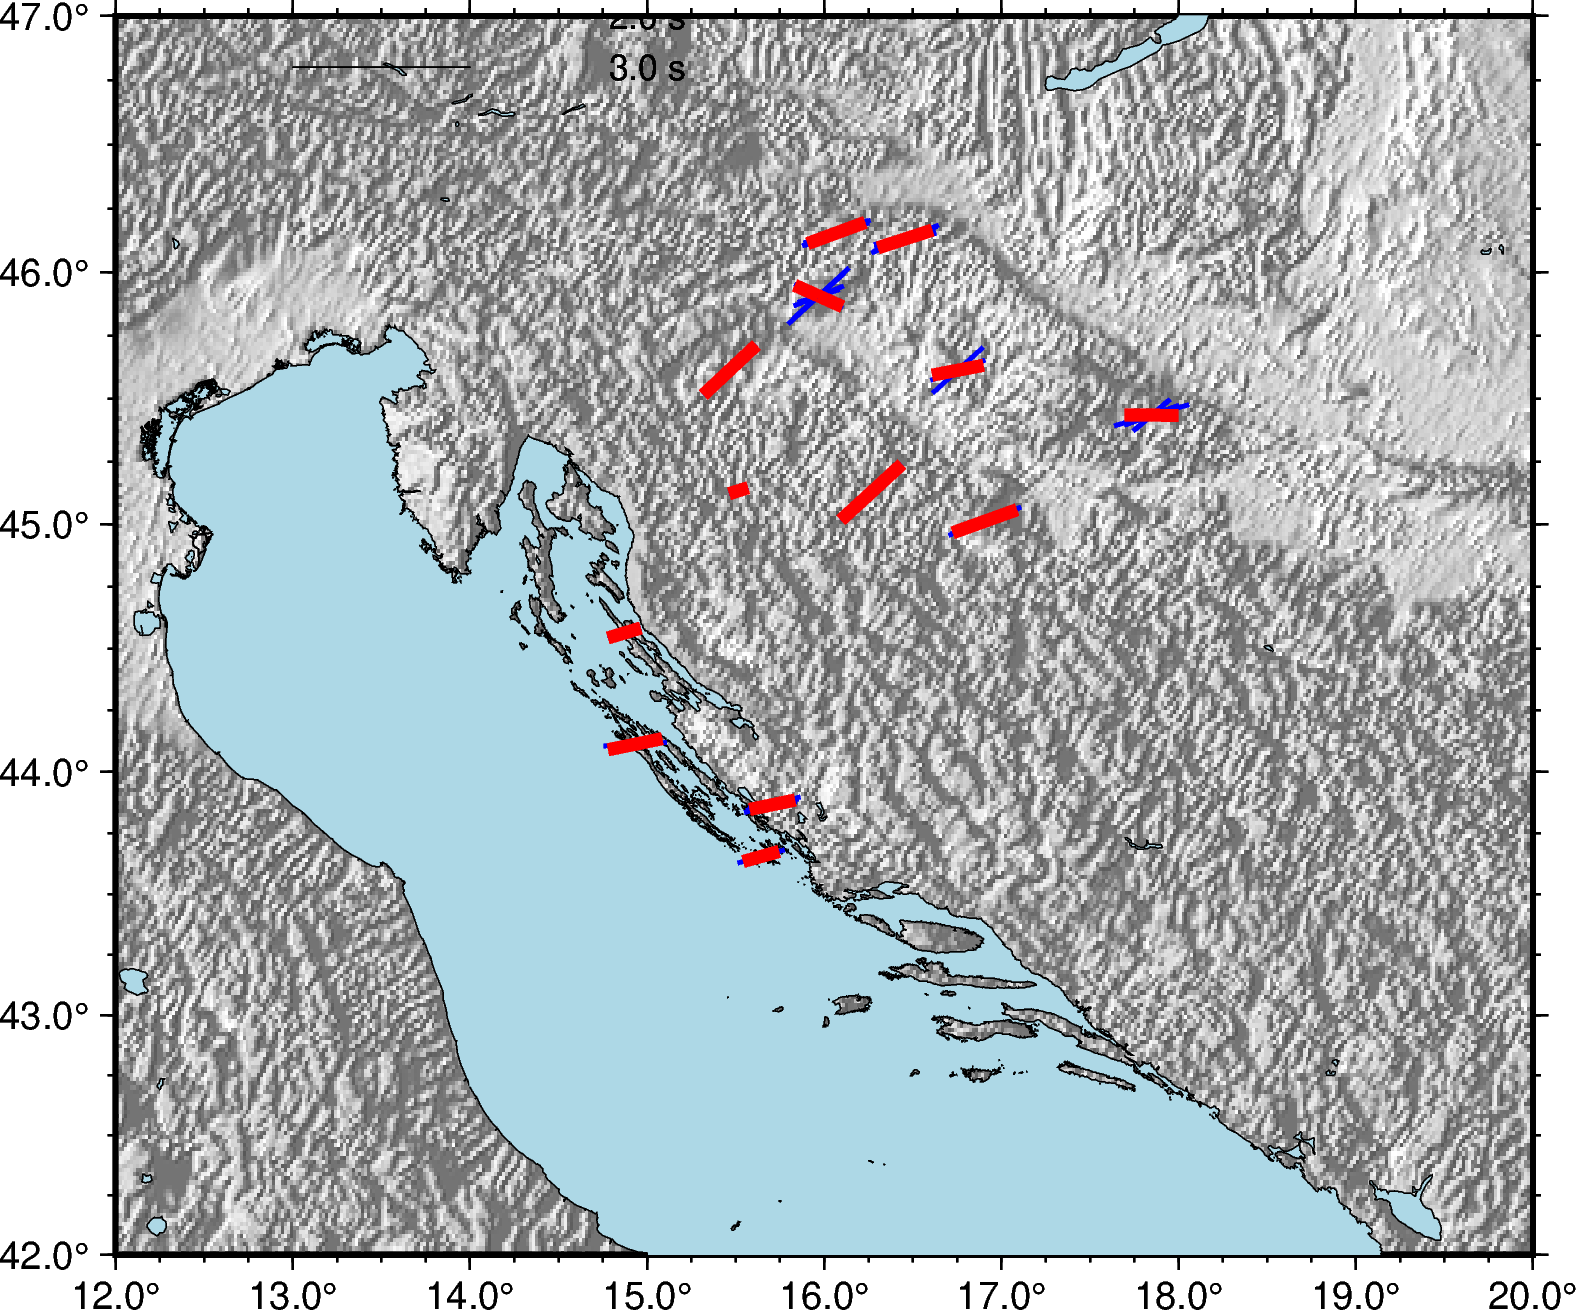

In [37]:
fig = pygmt.Figure()
res = "f"

grid = pygmt.datasets.load_earth_relief(resolution="01m", region=[12, 20, 42, 47])
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 45])

pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

fig.shift_origin(xshift="12.5c")

pygmt.makecpt(cmap="gray", series=[-2, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    frame=["a1f0.25", "WSen"],
    cmap=True,
    I = True
    )
    
fig.coast( 
        water='lightblue', 
        shorelines=True
    )
fig_one = plot_splitting_map_average(fig, df_category_good_only, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="1p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='gray', pencolor='blue')
plot_splitting_map_average(fig_one, station_averages, boxcoordinates=[
                   minlon, maxlon, minlat, maxlat], dcoord=0.5, dtscale=0.5, penwidth="3p",
                   proj="M10c", figname='Filter_7-20s_SNR_3_tw_50_null_map.png', frame=["a1f1", "WSen"],
                   markersizescale=0.1, colormap='gray', pencolor='red')
fig_one.show()

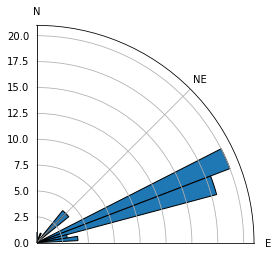

In [38]:
import numpy as np
import matplotlib.pyplot as plt

N = 15
bottom = 0
max_height = 4

angles=list()
for index,row in df_category_good_only.iterrows():
    angles.append(np.deg2rad(row['phi']%90))
    
theta = np.linspace(0.0, 0.5 * np.pi, N, endpoint=False)    
width = (0.5*np.pi) / N

counts, bins = np.histogram(angles, bins=15)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, counts, width=width, bottom=bottom, edgecolor='black')

ax.set_thetamin(0)
ax.set_thetamax(90)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

for r_label in ax.get_yticklabels():
    r_label.set_text('')
ax.set_xticks([0,np.pi/4,np.pi/2])
ax.set_xticklabels([r'N', r'NE', r'E'])
plt.show()

Histogram modulo 90 od azimuta za iskljucivo dobra mjerenja

[Text(0.0, 0, 'N'),
 Text(0.7853981633974483, 0, 'NE'),
 Text(1.5707963267948966, 0, 'E'),
 Text(3.141592653589793, 0, 'S'),
 Text(4.71238898038469, 0, 'W')]

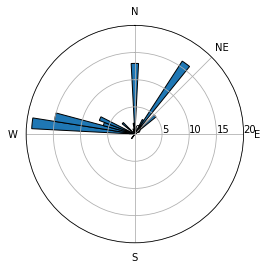

In [39]:
N = 60
bottom = 0
max_height = 4

angles=list()
for index,row in df_category_good.iterrows():
    angles.append(np.deg2rad(row['phi']))
    
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)    
width = (2*np.pi) / N

counts, bins = np.histogram(angles, bins=60)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, counts, width=width, bottom=bottom, edgecolor='black')

ax.set_thetamin(0)
ax.set_thetamax(360)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

for r_label in ax.get_yticklabels():
    r_label.set_text('')
    
ax.set_rlabel_position(90)
ax.set_yticks([0,5,10,15,20])
ax.set_xticks([0,np.pi/4,np.pi/2, np.pi, 1.5*np.pi])
ax.set_xticklabels([r'N', r'NE', r'E', r'S', r'W'])

Histogram azimuta dobrih i prosjecnih mjerenja

[Text(0.0, 0, 'N'),
 Text(0.7853981633974483, 0, 'NE'),
 Text(1.5707963267948966, 0, 'E'),
 Text(3.141592653589793, 0, 'S'),
 Text(4.71238898038469, 0, 'W')]

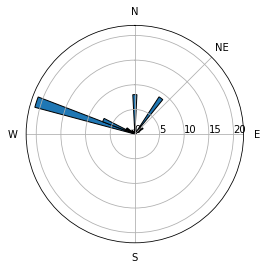

In [40]:
N = 60
bottom = 0
max_height = 4

angles=list()
for index,row in df_category_good_only.iterrows():
    angles.append(np.deg2rad(row['phi']))
    
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)    
width = (2*np.pi) / N

counts, bins = np.histogram(angles, bins=60)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, counts, width=width, bottom=bottom, edgecolor='black')

ax.set_thetamin(0)
ax.set_thetamax(360)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

for r_label in ax.get_yticklabels():
    r_label.set_text('')
    
ax.set_rlabel_position(90)
ax.set_yticks([0,5,10,15,20])
ax.set_xticks([0,np.pi/4,np.pi/2, np.pi, 1.5*np.pi])
ax.set_xticklabels([r'N', r'NE', r'E', r'S', r'W'])

Histogram azimuta za iskljucivo dobra mjerenja

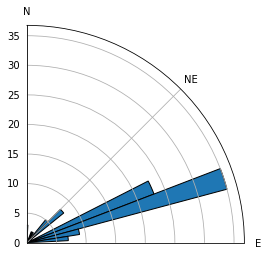

In [41]:
N = 15
bottom = 0
max_height = 4

angles=list()
for index,row in df_category_good.iterrows():
    angles.append(np.deg2rad(row['phi']%90))
    
theta = np.linspace(0.0, 0.5 * np.pi, N, endpoint=False)    
width = (0.5*np.pi) / N

counts, bins = np.histogram(angles, bins=15)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, counts, width=width, bottom=bottom, edgecolor='black')

ax.set_thetamin(0)
ax.set_thetamax(90)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

for r_label in ax.get_yticklabels():
    r_label.set_text('')
ax.set_xticks([0,np.pi/4,np.pi/2])
ax.set_xticklabels([r'N', r'NE', r'E'])
plt.show()

Histogram od modulo 90 azimuta za dobra i prosijecna mjerenja

[Text(0.0, 0, 'N'),
 Text(0.7853981633974483, 0, 'NE'),
 Text(1.5707963267948966, 0, 'E'),
 Text(3.141592653589793, 0, 'S'),
 Text(4.71238898038469, 0, 'W')]

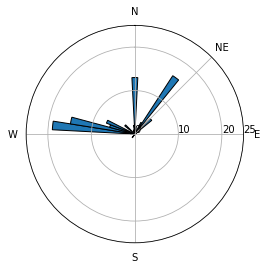

In [42]:
N = 60
bottom = 0
max_height = 4

angles=list()
for index,row in df_category_good.iterrows():
    angles.append(np.deg2rad(row['phi']))
    
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)    
width = (2*np.pi) / N

counts, bins = np.histogram(angles, bins=60)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, counts, width=width, bottom=bottom, edgecolor='black')

ax.set_thetamin(0)
ax.set_thetamax(360)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

for r_label in ax.get_yticklabels():
    r_label.set_text('')
    
ax.set_rlabel_position(90)
ax.set_yticks([0,10,20,25])
ax.set_xticks([0,np.pi/4,np.pi/2, np.pi, 1.5*np.pi])
ax.set_xticklabels([r'N', r'NE', r'E', r'S', r'W'])

Histogram od azimuta za dobra i prosijecna mjerenja

[Text(0.0, 0, 'N'),
 Text(0.7853981633974483, 0, 'NE'),
 Text(1.5707963267948966, 0, 'E'),
 Text(3.141592653589793, 0, 'S'),
 Text(4.71238898038469, 0, 'W')]

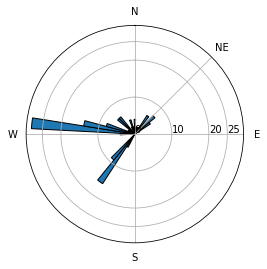

In [43]:
N = 60
bottom = 0
max_height = 4

angles=list()
for index,row in dfdata_null.iterrows():
    angles.append(np.deg2rad(row['phi']))
    
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)    
width = (2*np.pi) / N

counts, bins = np.histogram(angles, bins=60)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, counts, width=width, bottom=bottom, edgecolor='black')

ax.set_thetamin(0)
ax.set_thetamax(360)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

for r_label in ax.get_yticklabels():
    r_label.set_text('')
    
ax.set_rlabel_position(90)
ax.set_yticks([0,10,20,25])
ax.set_xticks([0,np.pi/4,np.pi/2, np.pi, 1.5*np.pi])
ax.set_xticklabels([r'N', r'NE', r'E', r'S', r'W'])

Kruzni hitogram null mjerenja

In [44]:
import pygmt 
import os
import geopandas as gpd

C:\Users\dodos\AppData\Local\Temp\ipykernel_10124\699373785.py:39: SyntaxWarning: Short-form parameter (I) is not recommended. Use long-form parameter 'shading' instead.
  fig.grdimage(
C:\Users\dodos\AppData\Local\Temp\ipykernel_10124\699373785.py:39: SyntaxWarning: Short-form parameter (t) is not recommended. Use long-form parameter 'transparency' instead.
  fig.grdimage(
grdimage [WARNING]: 10 annotations along the bottom border were skipped due to crowding.
grdimage [WARNING]: 6 annotations along the left border were skipped due to crowding.
grdimage [WARNING]: Crowding decisions is controlled by MAP_ANNOT_MIN_SPACING, currently set to 26.1121p.
grdimage [WARNING]: Decrease or increase MAP_ANNOT_MIN_SPACING to see more or fewer annotations, with 0 showing all annotations.


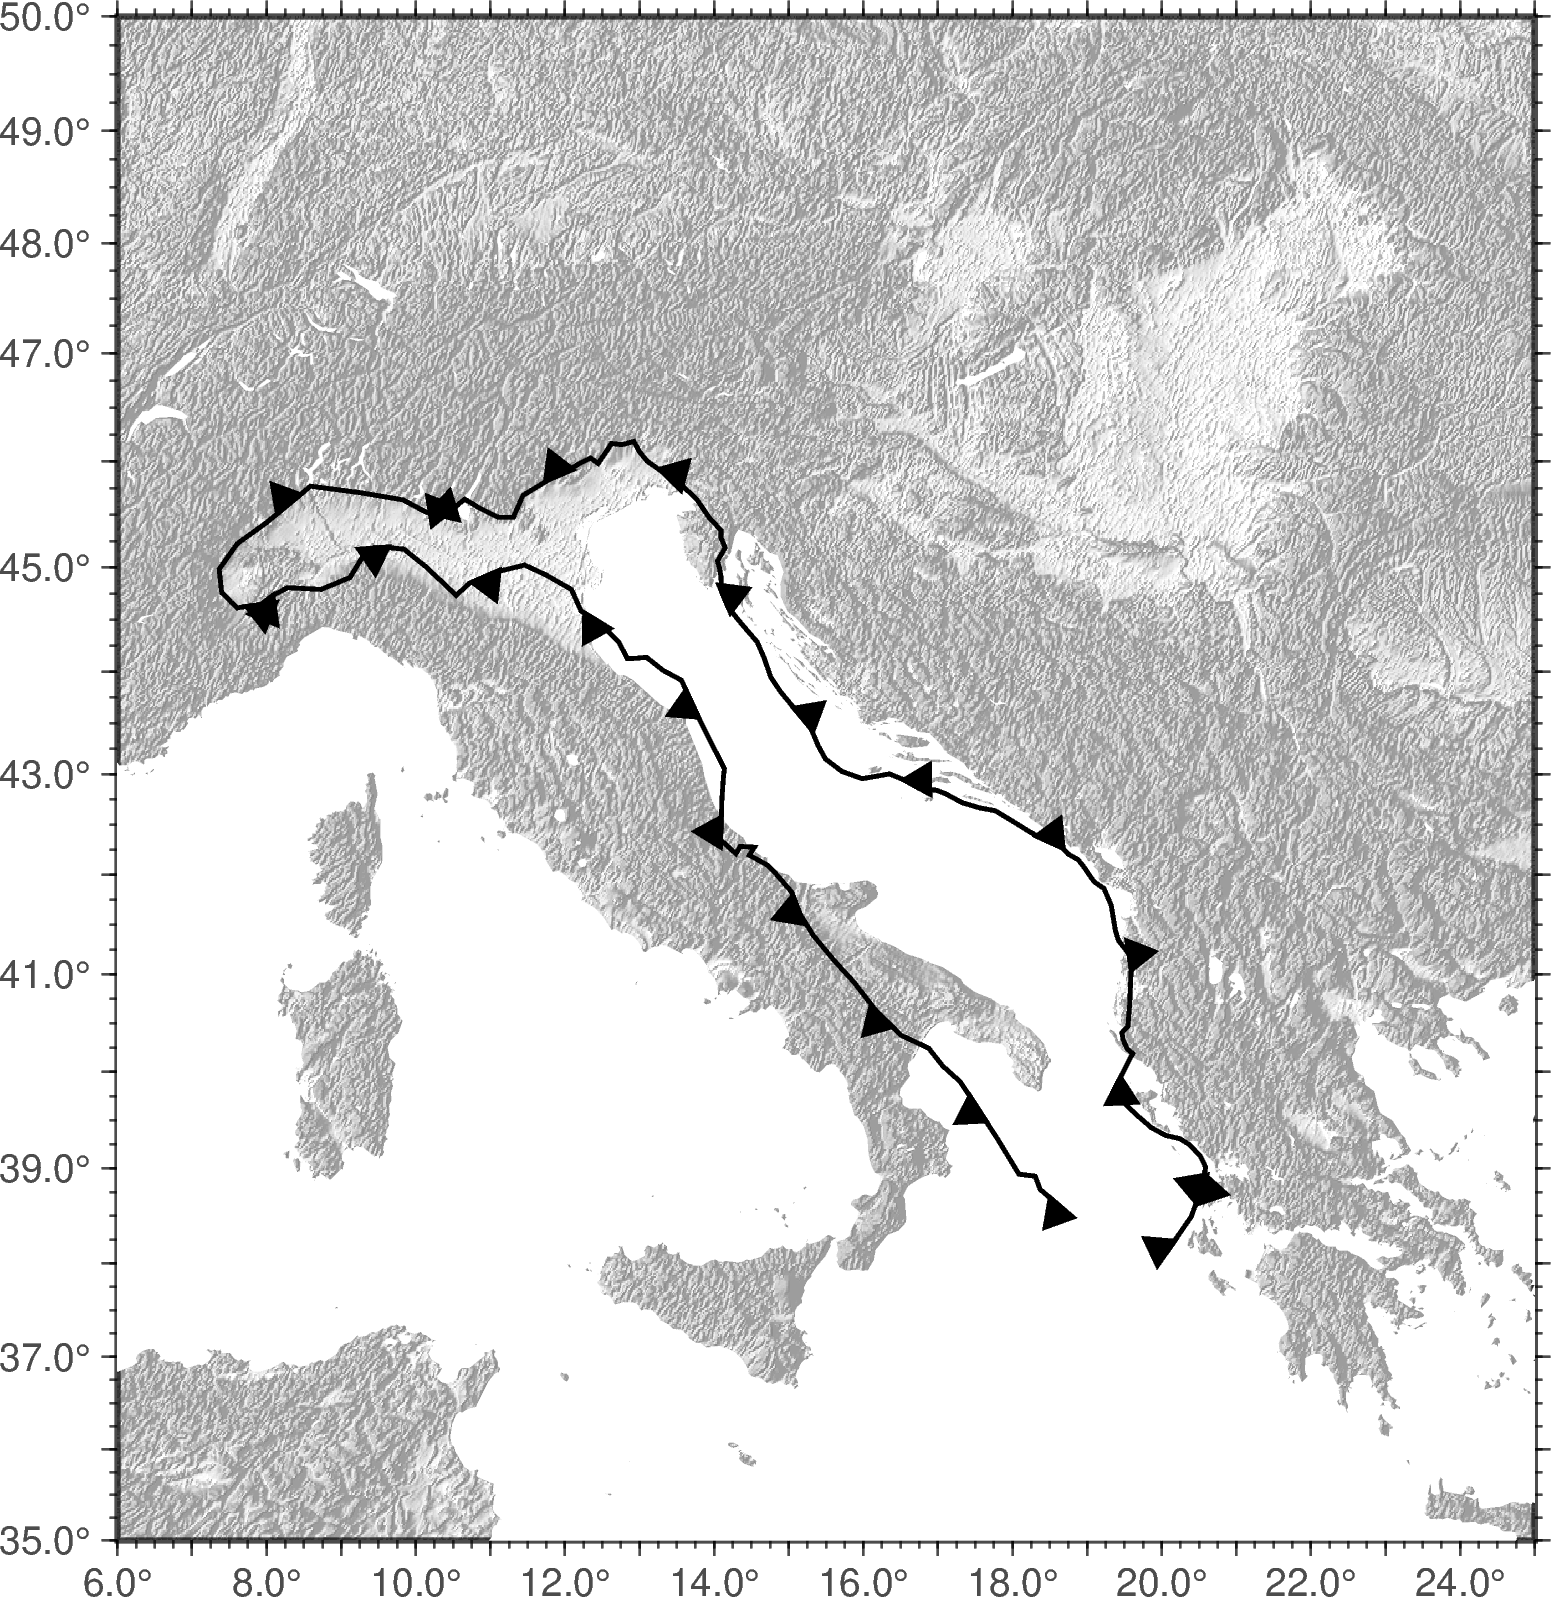

In [45]:
# ountiesShp = os.path.join(r"C:\Users\dodos\diplomski\sjever\global_tectonics\global_tectonics\plates&provinces\shp","plates.shp")
countiesShp = os.path.join(r"C:\Users\dodos\diplomski\sjever\global_tectonics\global_tectonics\polygon_data","GSHHS_I_L1.shp")
SHP_FILE = os.path.join(r"C:\Users\dodos\diplomski\sjever\global_tectonics\global_tectonics\plates&provinces\shp","plate_boundaries.shp")
oc_boundaries = os.path.join(r"C:\Users\dodos\diplomski\sjever\global_tectonics\global_tectonics\plates&provinces\shp",
                             "plate_boundaries.shp")

minlon, maxlon = 6, 25
minlat, maxlat = 35, 50


gdf = gpd.read_file(SHP_FILE)

all_data = []
#for item in gdf:
#    print(item)
#all_data.append(gdf[gdf["subplate"]=="Adriatic"])
#all_data.append(gdf[gdf["COUNTYENG"]=="Tainan City"])
#print(all_data[0])

# Define region of interest around Yosemite valley
region = [minlon, maxlon, minlat, maxlat]

# Load sample grid (3 arc-seconds global relief) in target area
grid = pygmt.datasets.load_earth_relief(resolution="01m", region=region)


# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])

fig = pygmt.Figure()
# define figure configuration
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain")

# Shift plot origin of the second map by 12.5 cm in x direction
fig.shift_origin(xshift="12.5c")

pygmt.makecpt(cmap="gray", series=[-2, 0.3, 0.01])
fig.grdimage(
    grid=dgrid,
    projection="M12c",
    frame=["a1f0.25", "WSen"],
    cmap=True,
    I = True,
    t=30
)
fig.coast( 
    water='white', 
    shorelines=False)

datas = gdf.loc[gdf['plate2'] == 'Adriatic']#['geometry']

#for data_shp in all_data:
#    fig.plot(data=data_shp,color="white", pen=["0.02c", 'white'])
#print(type(datas))
frontal_thrust = datas.loc[datas['feature'] == 'Dinaric Frontal Thrust']
fig.plot(data=datas, pen="1p,black", style='f1.2c/0.25c+l+t',color="black" )
fig.plot(datas)

fig.show()
fig.savefig('tectonic.png', crop=True, dpi=1080)

In [46]:
gdf

feature_id                      feature               type comment  \
0           1.0              Galapagos Ridge   spreading center    None   
1           2.0  Papuan Fold and Thrust Belt     collision zone    None   
2           3.0                         None  dextral transform    None   
3           4.0                 Regina Ridge   spreading center    None   
4           5.0        South Shetland Trough    subduction zone    None   
..          ...                          ...                ...     ...   
566       115.0                         None  dextral transform    None   
567       115.0                         None     extension zone    None   
568       115.0                         None  dextral transform    None   
569       115.0                         None     extension zone    None   
570       115.0               Imperial Fault  dextral transform    None   

        plate1                 plate2  level      length  \
0    Galapagos                  Cocos      1   48.231535   
1        Moake             Australian      2  633.711340   
2       Sonora                 Rivera      1  181.382449   
3        Coiba                Malpelo      2  561.018201   
4     Shetland                Phoenix      2  447.947909   
..         ...                    ...    ...         ...   
566     Sonora  California Borderland      1  896.721096   
567     Sonora  California Borderland      1  896.721096   
568     Sonora  California Borderland      1  896.721096   
569     Sonora  California Borderland      1  896.721096   
570     Sonora  California Borderland      1  896.721096   

                                              geometry  
0    LINESTRING (-101.93927 2.22338, -101.77872 2.1...  
1    LINESTRING (135.40806 -4.29195, 135.81709 -4.3...  
2    LINESTRING (-108.58200 21.90470, -108.39700 21...  
3    LINESTRING (-77.75441 5.60254, -78.17097 5.624...  
4    LINESTRING (-56.54601 -60.68744, -56.97075 -60...  
..                                                 ...  
566  LINESTRING (-113.96900 29.64580, -113.77500 29...  
567  LINESTRING (-113.28100 29.00840, -113.33900 28...  
568  LINESTRING (-113.33900 28.94980, -113.19603 28...  
569  LINESTRING (-113.80700 30.31350, -113.97538 30...  
570  LINESTRING (-115.48697 32.84074, -115.38583 32...  

[571 rows x 9 columns]

Crtanje Piercing points


In [67]:
import obspy
from rf import RFStream
from obspy.taup import TauPyModel

filename=r'C:\Users\dodos\diplomski\sjever\mseed_files\A050A_Z3\A050A_2019187_031953.mseed'
stream = obspy.read(filename)

vel_model = TauPyModel(model='iasp91')

rf_stream = RFStream()

for tr in st:
    tr.stats.station_latitude = 43.654255
    tr.stats.station_longitude = 15.643891
    rf_stream += RFStream(tr)

rf_stream.ppoints(pp_depth=660, pp_phase='S', model='iasp91')

KeyError: 'slowness'

In [68]:
import obspy
from rf import RFStream
from obspy.taup import TauPyModel
 add 
filename = r'C:\Users\dodos\diplomski\sjever\mseed_files\A050A_Z3\A050A_2019187_031953.mseed'
stream = obspy.read(filename)

vel_model = TauPyModel(model='iasp91')

rf_stream = RFStream()

for tr in stream:
    tr.stats.station_latitude = 43.654255
    tr.stats.station_longitude = 15.643891
    event_depth = tr.stats['event']['depth'] / 1000.0  # convert to km
    epicentral_distance = tr.stats['dist']
    arrivals = vel_model.get_travel_times(source_depth_in_km=event_depth, distance_in_degree=epicentral_distance, phase_list=['S'])
    if len(arrivals) == 0:
        continue
    else:
        arrival = arrivals[0]
        tr.stats['slowness'] = arrival.ray_param_sec_degree
        rf_stream += RFStream(tr)

rf_stream.ppoints(pp_depth=660, pp_phase='S', model='iasp91')

KeyError: 'event'

In [69]:
stream[0].stats

          network: Z3
          station: A050A
         location: 
          channel: BHE
        starttime: 2019-07-06T03:19:53.035000Z
          endtime: 2019-07-06T04:19:53.035000Z
    sampling_rate: 50.0
            delta: 0.02
             npts: 180001
            calib: 1.0
          _format: MSEED
            mseed: AttribDict({'dataquality': 'D', 'number_of_records': 312, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 467456})
 station_latitude: 43.654255
station_longitude: 15.643891